# 서울시 구별 CCTV 현황 분석

In [1]:
from IPython.display import Image

## CCTV 현황과 인구 현황 데이터 구하기

* 서울 열린데이터 광장(data.seoul.go.kr) 접속
* 검색하기 'cctv' 입력 -> '서울시 자치구 년도별 CCTV 설치 현황' 다운
* 검색하기 '서울시 서울통계' 입력 -> '서울시 주민등록인구 (구별) 통계' 다운

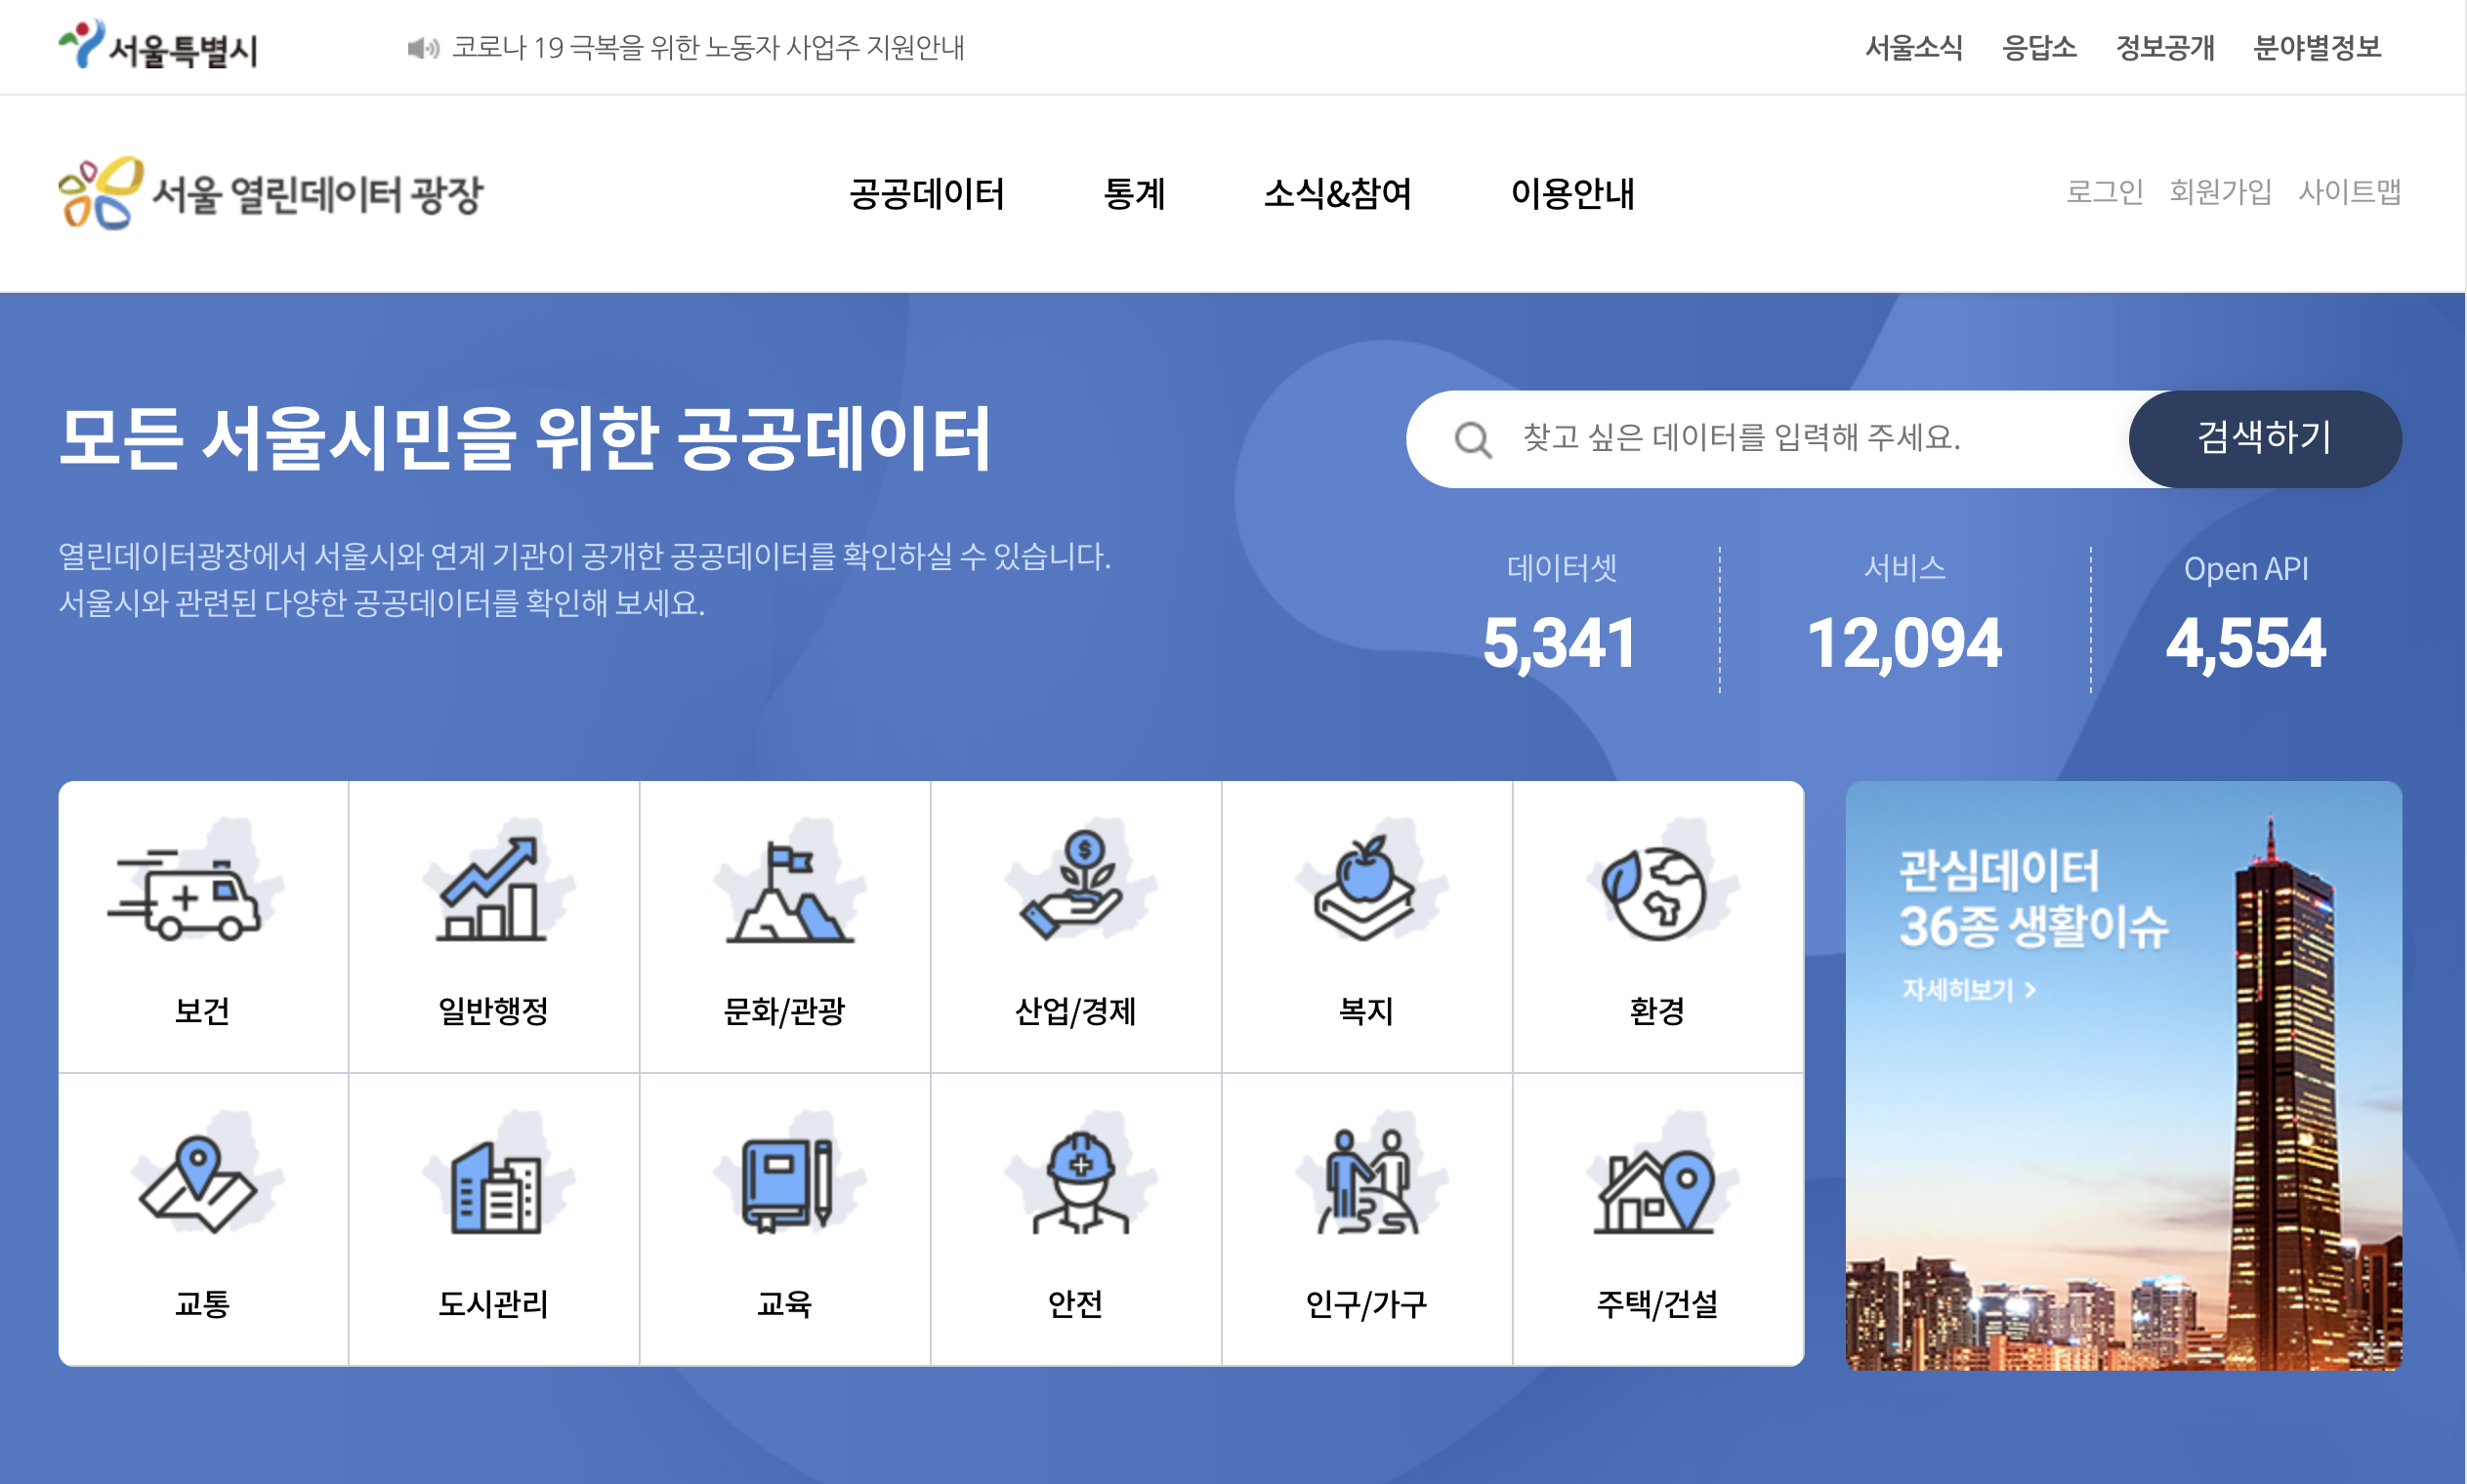

In [2]:
Image("data/data_seoul_1.png")

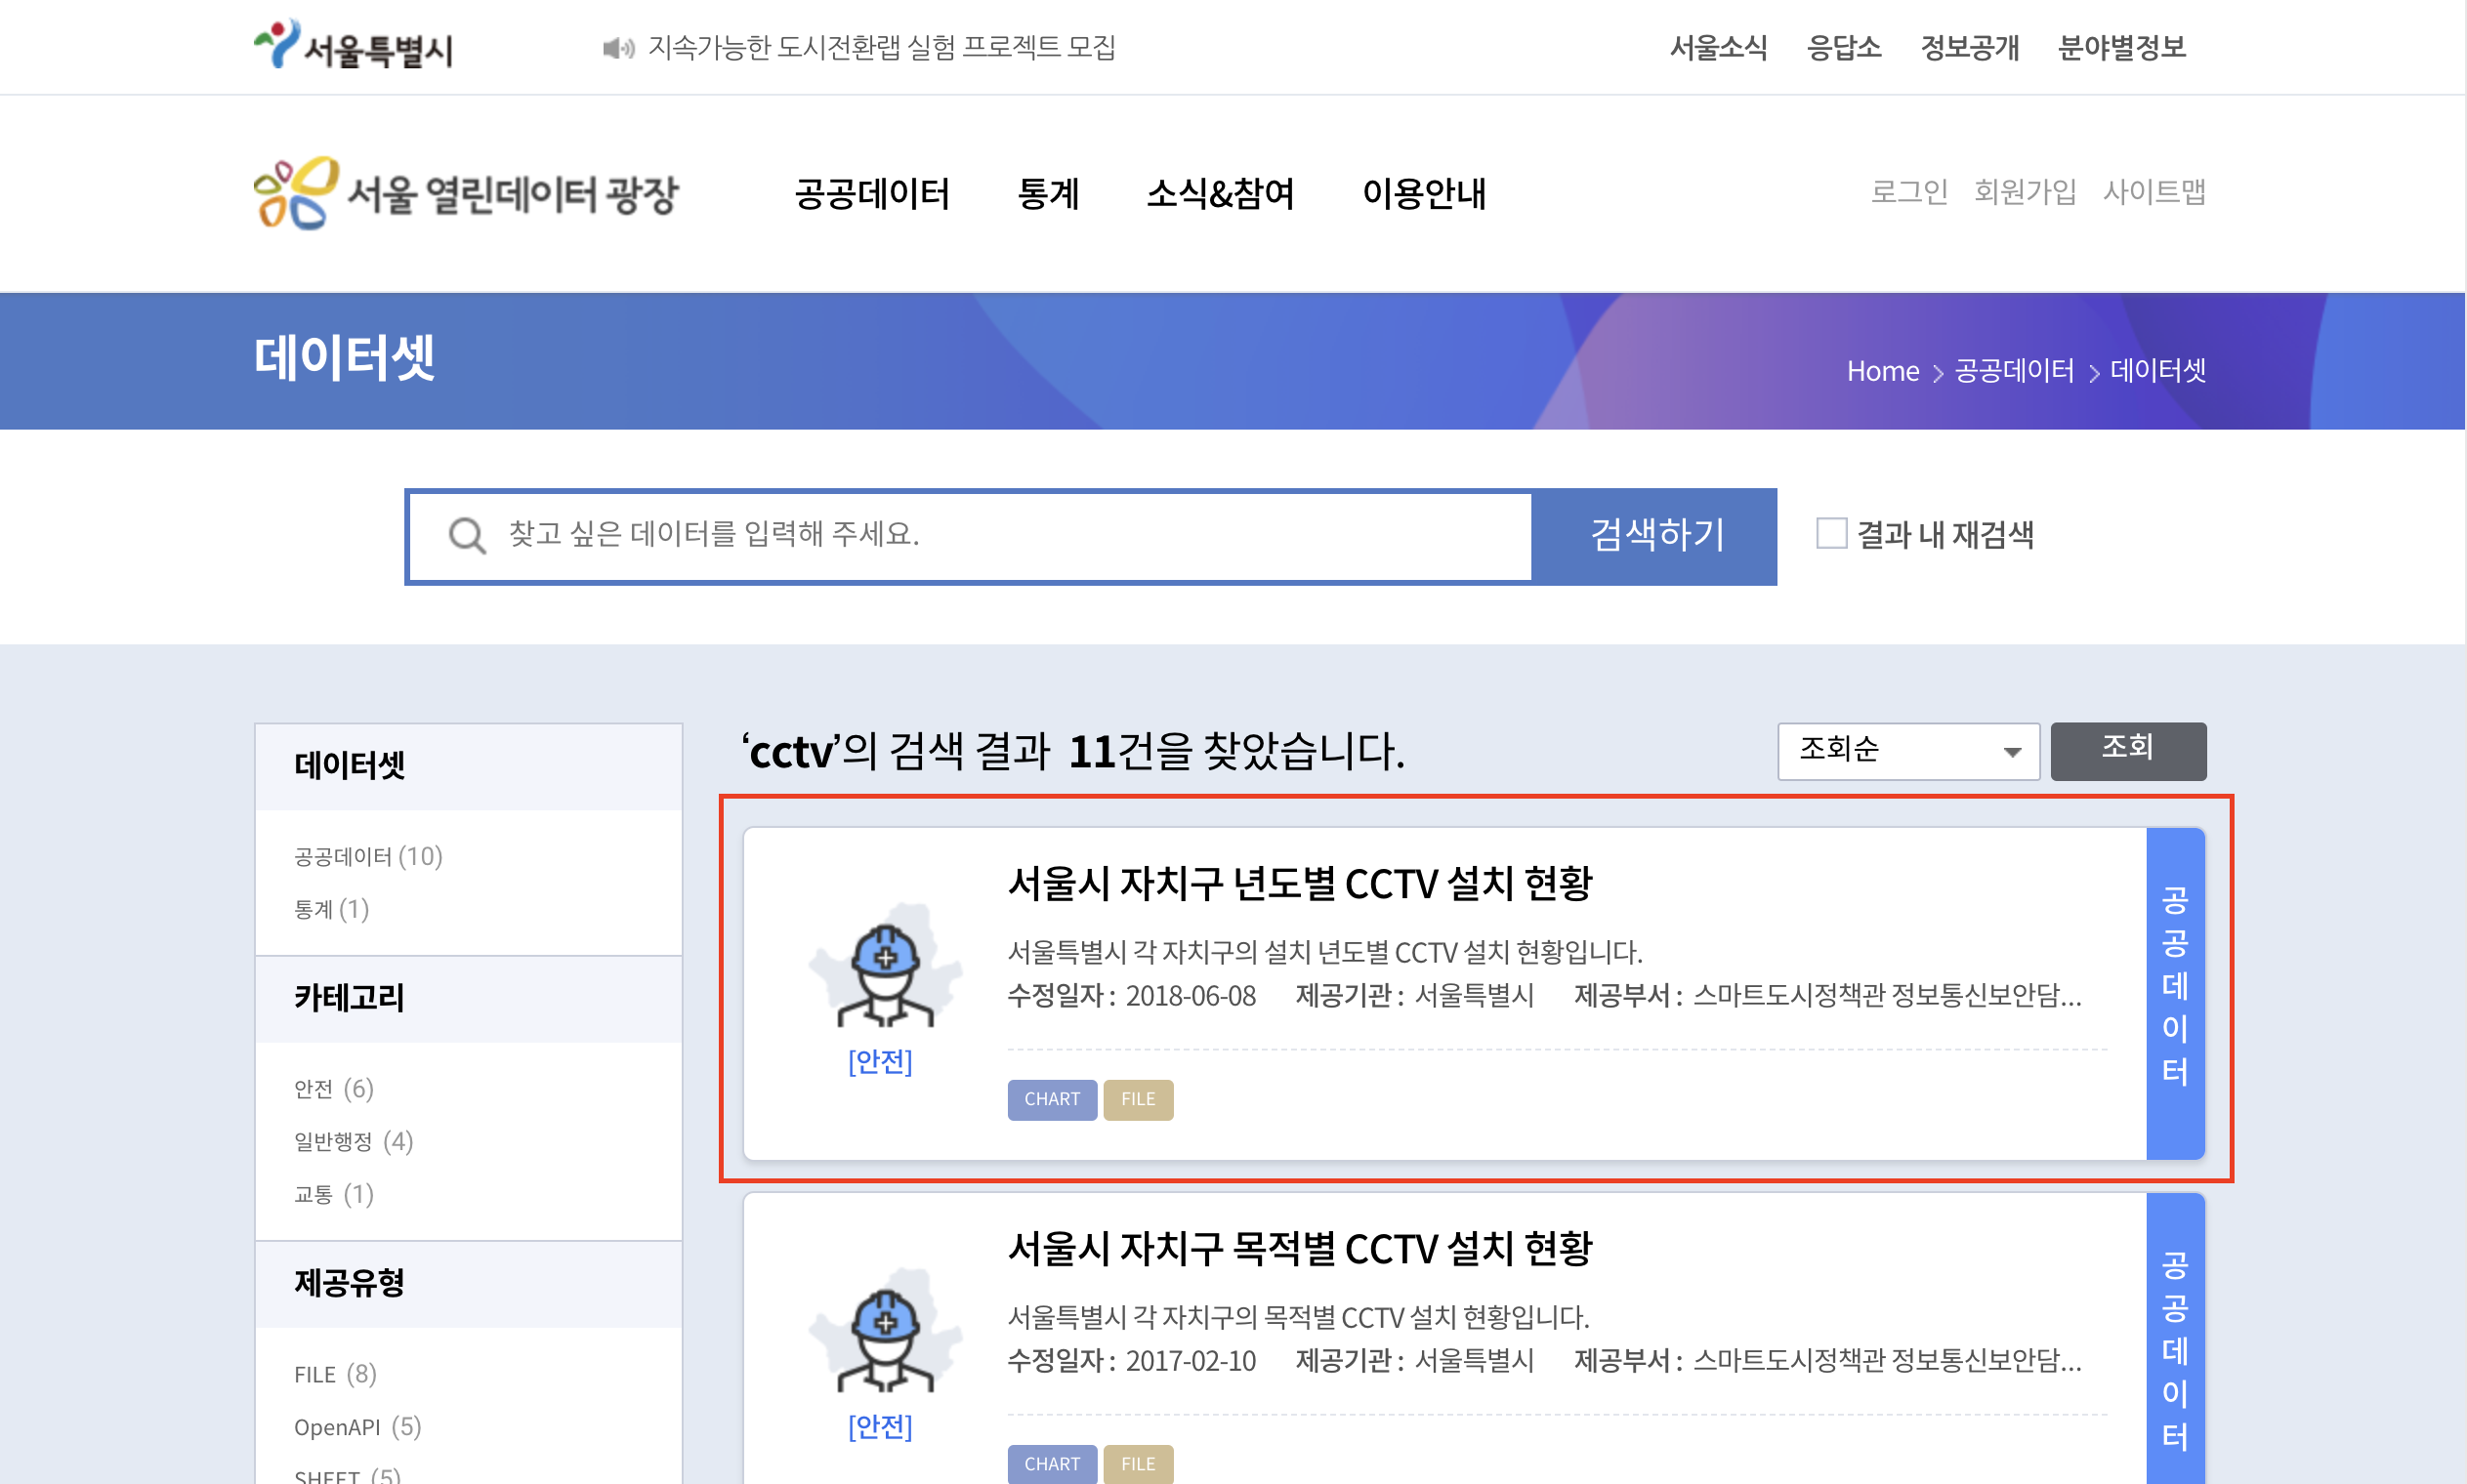

In [3]:
Image("data/data_seoul_2.png")

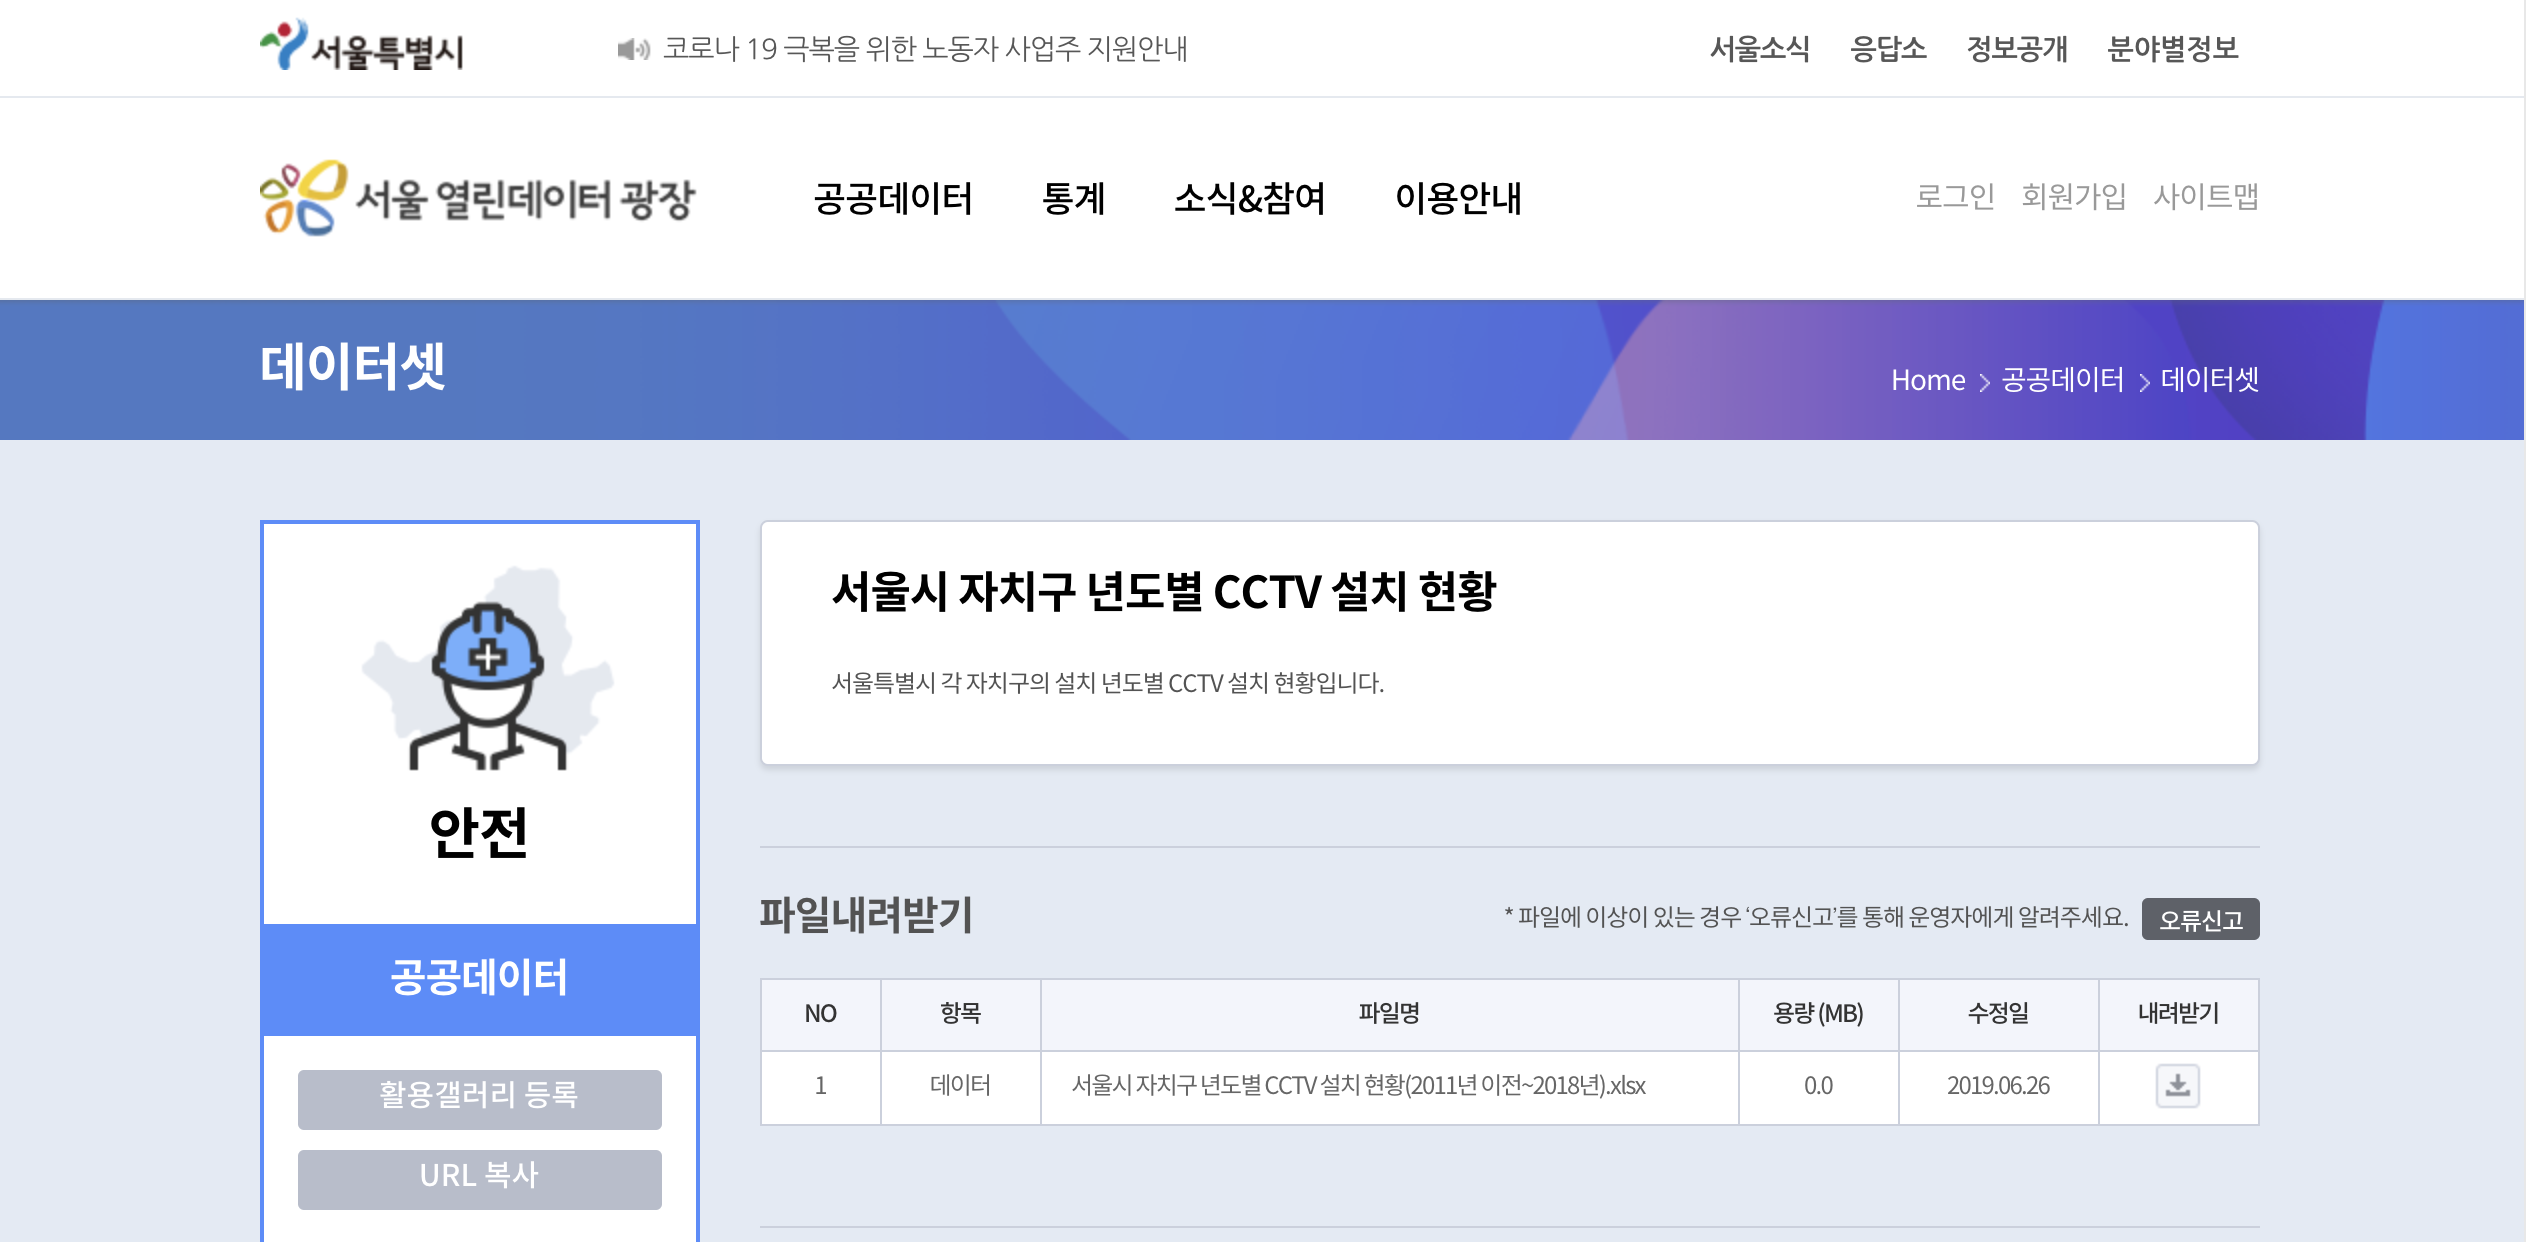

In [4]:
Image("data/data_seoul_3.png")

* 다운을 받으면 다음과 같은 파일이 생김
* 서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx
* 파일 이름을 변경해서 data 폴더에 넣어줌 - seoul_cctv_data.csv와 seoul_cctv_result.csv

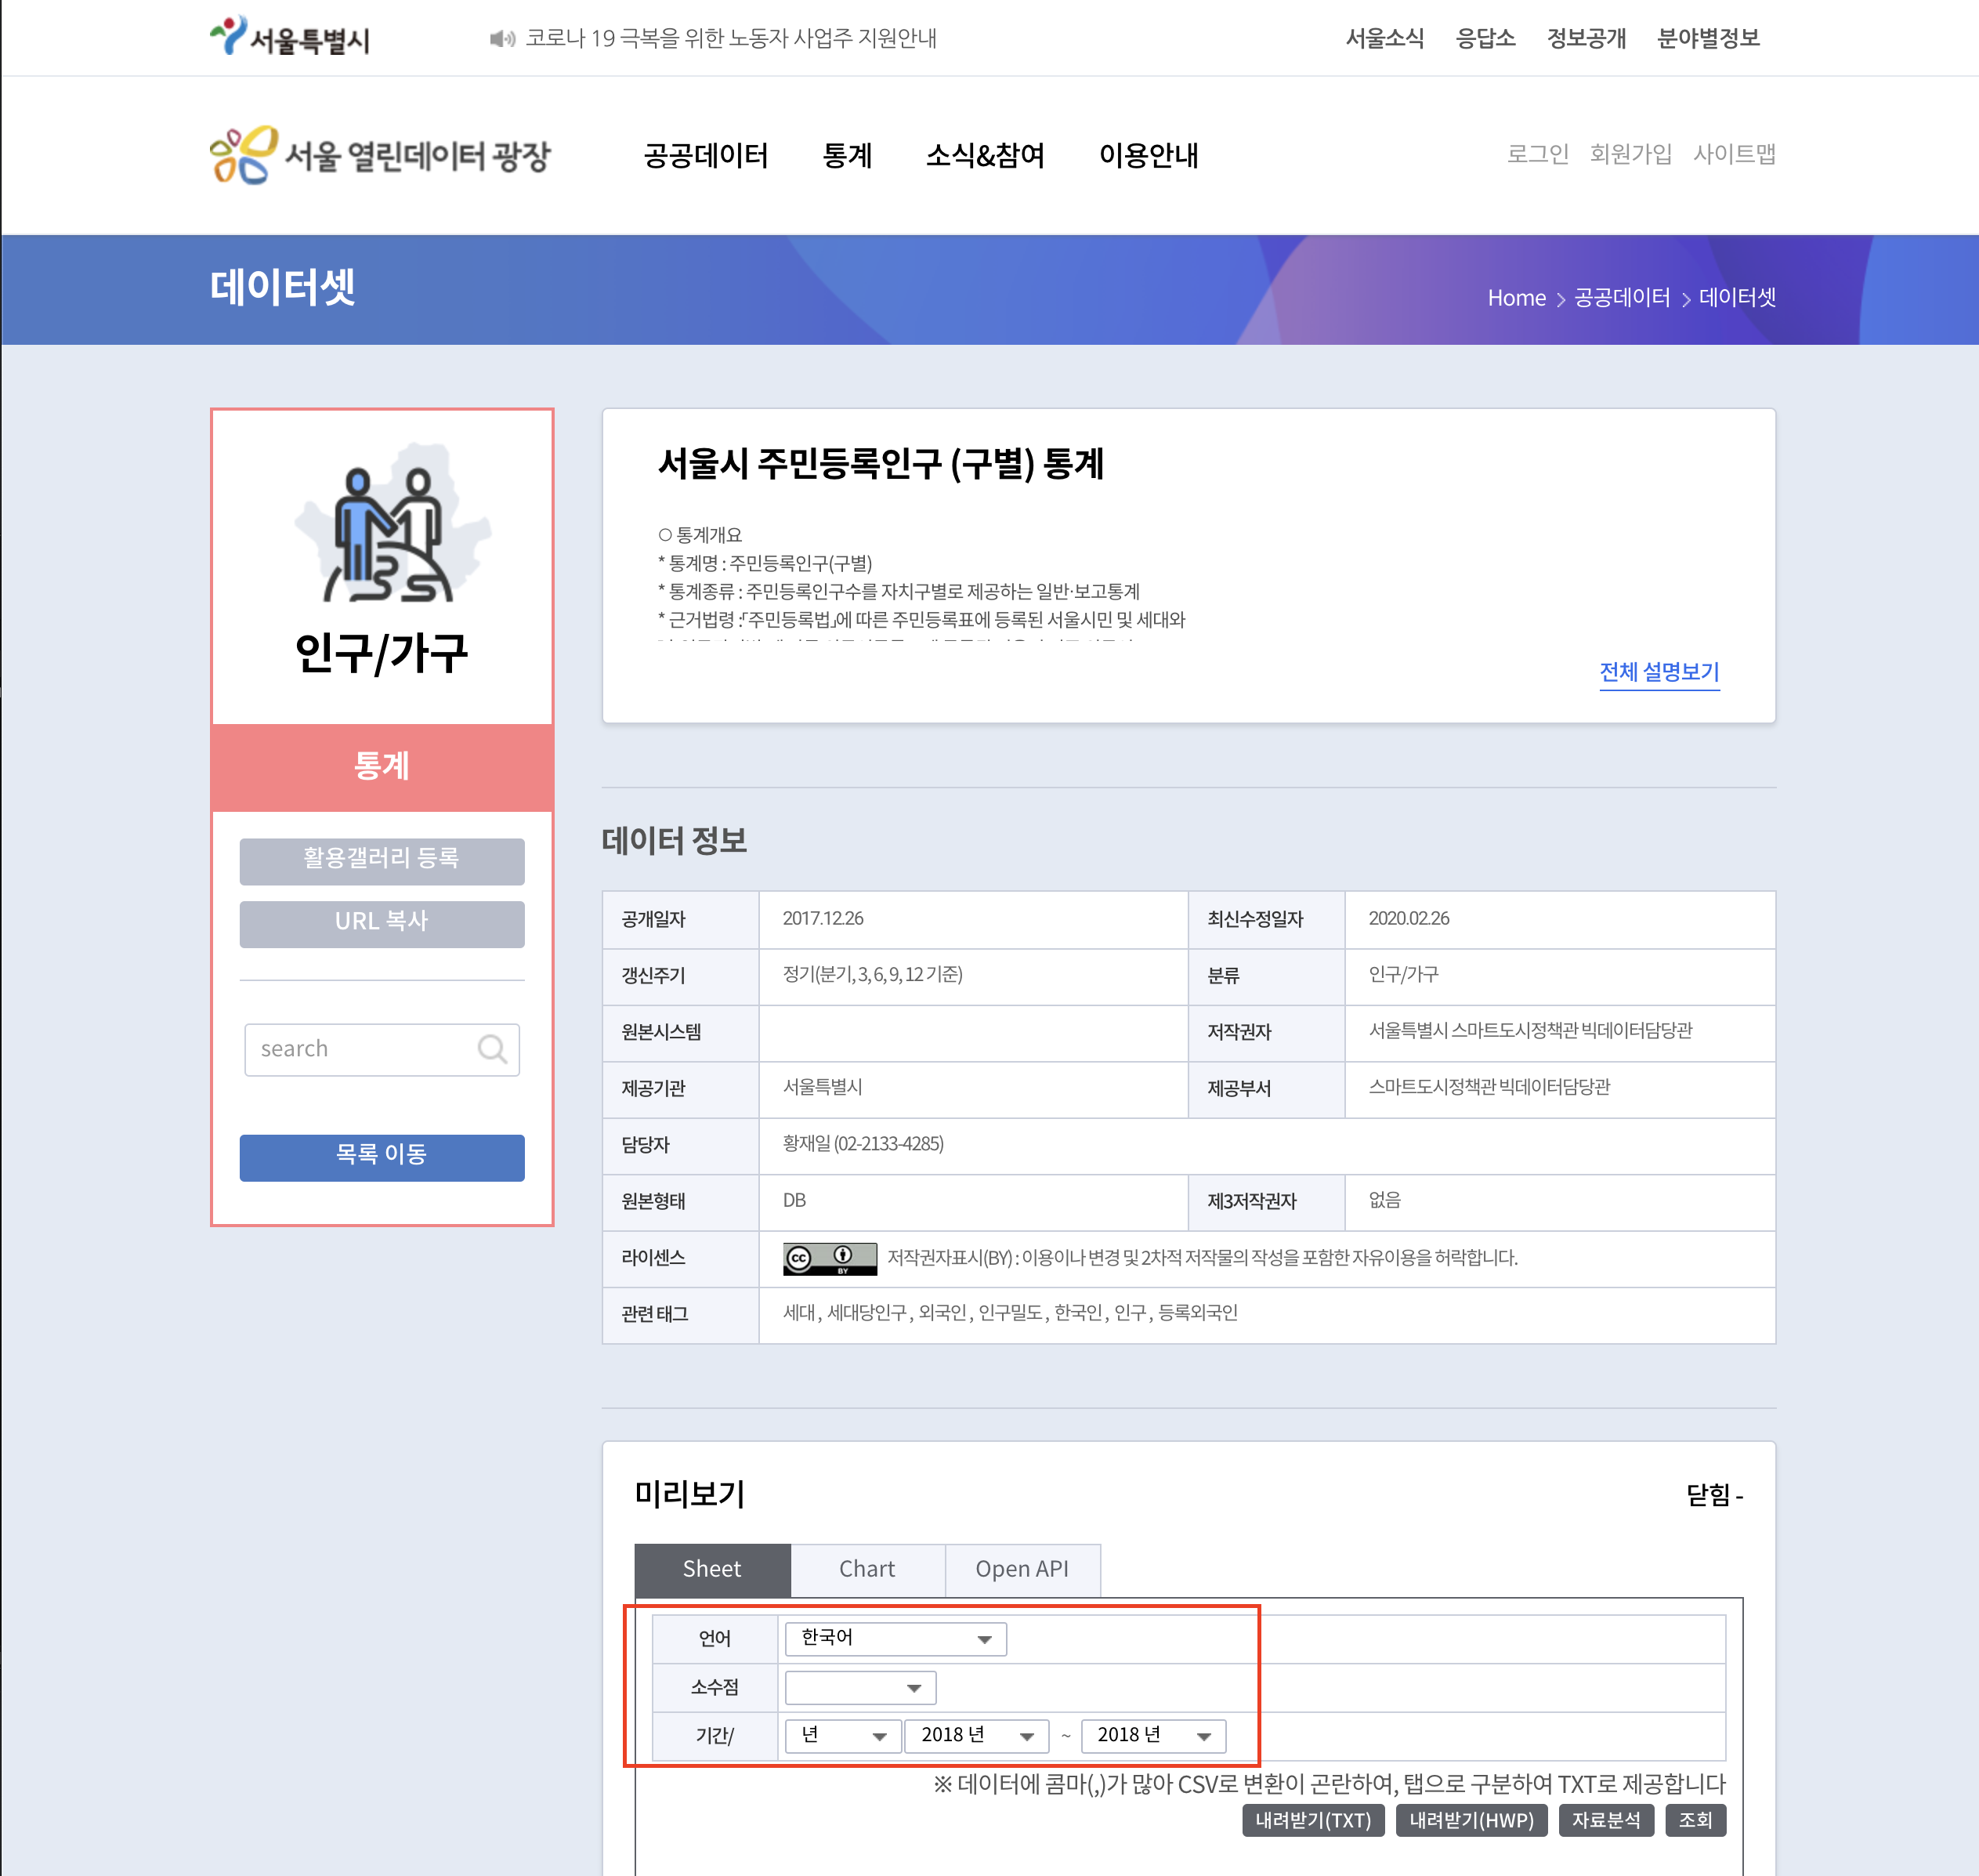

In [5]:
Image('data/seoul-population.png')

* '서울시 자치구 년도별 CCTV 설치 현황' 데이터가 2018년까지 있으므로,
* 기간을 2018년으로 변경해서 다운
* data 폴더에 저장 'seoul_polulation_data.xlsx'

## 파이썬에서 텍스트 파일과 엑셀 파일을 읽기 - pandas

In [6]:
import pandas as pd
cctv_seoul = pd.read_csv('./data/seoul_cctv_data.csv', encoding='utf-8', thousands=',')
cctv_seoul.head()

기관명      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강 남 구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1  강 동 구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2  강 북 구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
3  강 서 구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0
4  관 악 구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0

* cctv_seoul 데이터를 봤더니, 동대문구와 중랑구에 '2011년 이전' '2012년' '2013년' 결측치가 있는 것을 발견
* 25~27번 행에도 결측치가 있음

In [7]:
# 결측치 제거 - 동대문구와 중랑구도 같이 제거됨, 정확한 데이터값을 알 수 없어서 그냥 진행함 (교육의 목적만 있음)
cctv_seoul.dropna(inplace=True)
cctv_seoul.head()

기관명      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강 남 구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1  강 동 구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2  강 북 구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
3  강 서 구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0
4  관 악 구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0

#### 사용할 함수 `remove_blank` 정의
- `replace`를 활용해서 공백을 제거

In [8]:
def remove_blank(str):
    str = str.replace(" ", "")
    return str

In [9]:
remove_blank("강 남 구")

'강남구'

In [10]:
cctv_seoul['기관명'] = cctv_seoul['기관명'].apply(remove_blank)
cctv_seoul.head()

기관명      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1  강동구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2  강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
3  강서구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0
4  관악구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0

In [11]:
cctv_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [12]:
cctv_seoul.rename(columns={'기관명':'구별'}, inplace=True)

In [13]:
cctv_seoul.head(3)

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1  강동구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2  강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0

In [14]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 23
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        23 non-null     object 
 1   소계        23 non-null     float64
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     23 non-null     float64
 6   2015년     23 non-null     float64
 7   2016년     23 non-null     float64
 8   2017년     23 non-null     float64
 9   2018년     23 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.0+ KB


In [15]:
cctv_seoul.head()

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1  강동구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2  강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
3  강서구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0
4  관악구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0

In [16]:
pop_seoul = pd.read_excel('./data/seoul_population_data.xlsx', 
                          usecols = 'B, D, G, J, N',
                          encoding='utf-8', thousands=',', header=2)
pop_seoul

자치구         계      계.1     계.2  65세이상고령자
0     합계  10049607  9765623  283984   1416131
1    종로구    163026   153065    9961     26742
2     중구    135633   125725    9908     22005
3    용산구    245090   228999   16091     37640
4    성동구    316463   308221    8242     42767
5    광진구    371063   355559   15504     45619
6   동대문구    364338   348052   16286     57165
7    중랑구    408147   403209    4938     61830
8    성북구    447687   435868   11819     67782
9    강북구    322915   319164    3751     58196
10   도봉구    341649   339413    2236     55964
11   노원구    548160   543752    4408     77096
12   은평구    487666   483197    4469     77420
13  서대문구    323080   310313   12767     50456
14   마포구    386359   375077   11282     50833
15   양천구    468145   464185    3960     58045
16   강서구    603611   596949    6662     79660
17   구로구    438486   404497   33989     61801
18   금천구    254021   233917   20104     35739
19  영등포구    403600   367778   35822     55673
20   동작구    409385   396203   13182     59479
21   관악구    520040   501957   18083     72249
22   서초구    438163   433951    4212     54751
23   강남구    547453   542364    5089     67085
24   송파구    673507   666635    6872     81364
25   강동구    431920   427573    4347     58770

In [17]:
pop_seoul.rename(columns={'자치구':'구별',
                          '계':'인구수',
                          '계.1':'한국인',
                          '계.2':'외국인',
                          '65세이상고령자':'고령자'}, inplace=True)

In [18]:
pop_seoul.head()

구별       인구수      한국인     외국인      고령자
0   합계  10049607  9765623  283984  1416131
1  종로구    163026   153065    9961    26742
2   중구    135633   125725    9908    22005
3  용산구    245090   228999   16091    37640
4  성동구    316463   308221    8242    42767

## pandas 기초 익히기

In [19]:
import pandas as pd
import numpy as np

In [20]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [21]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['A','B','C','D'])
df

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-05 -0.586848  0.178222  1.447973 -0.216804
2013-01-06  0.785777  0.360391  0.757778  1.896645

In [23]:
df.head(3)

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002

In [24]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [26]:
df.values

array([[ 0.89148024,  1.88107674, -1.72817396,  1.58524428],
       [ 1.14961236, -0.14813153,  0.13891848, -0.67523977],
       [-0.16927127, -0.97264295, -1.98711652,  0.24800218],
       [ 0.15039147,  1.7635996 ,  1.15675076,  0.07033732],
       [-0.58684787,  0.17822198,  1.44797328, -0.21680385],
       [ 0.78577733,  0.36039146,  0.75777757,  1.89664505]])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [28]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.370190  0.510419 -0.035645  0.484698
std    0.679295  1.114916  1.480258  1.026652
min   -0.586848 -0.972643 -1.987117 -0.675240
25%   -0.089356 -0.066543 -1.261401 -0.145019
50%    0.468084  0.269307  0.448348  0.159170
75%    0.865055  1.412798  1.057007  1.250934
max    1.149612  1.881077  1.447973  1.896645

In [29]:
df.sort_values(by='B', ascending=False)

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-06  0.785777  0.360391  0.757778  1.896645
2013-01-05 -0.586848  0.178222  1.447973 -0.216804
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002

In [30]:
df.sort_values(by='B')

A         B         C         D
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-05 -0.586848  0.178222  1.447973 -0.216804
2013-01-06  0.785777  0.360391  0.757778  1.896645
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-01  0.891480  1.881077 -1.728174  1.585244

In [31]:
df[0:3]

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002

In [32]:
df['A']

2013-01-01    0.891480
2013-01-02    1.149612
2013-01-03   -0.169271
2013-01-04    0.150391
2013-01-05   -0.586848
2013-01-06    0.785777
Freq: D, Name: A, dtype: float64

In [33]:
df['20130101':'20130105']

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-05 -0.586848  0.178222  1.447973 -0.216804

In [34]:
df.loc[dates[0]]

A    0.891480
B    1.881077
C   -1.728174
D    1.585244
Name: 2013-01-01 00:00:00, dtype: float64

In [35]:
df.loc[:,['A','B']]

A         B
2013-01-01  0.891480  1.881077
2013-01-02  1.149612 -0.148132
2013-01-03 -0.169271 -0.972643
2013-01-04  0.150391  1.763600
2013-01-05 -0.586848  0.178222
2013-01-06  0.785777  0.360391

In [36]:
df.loc['20130102':'20130104',['A','C']]

A         C
2013-01-02  1.149612  0.138918
2013-01-03 -0.169271 -1.987117
2013-01-04  0.150391  1.156751

In [37]:
df.loc[dates[0],'A']

0.8914802364468396

In [38]:
df.iloc[3]

A    0.150391
B    1.763600
C    1.156751
D    0.070337
Name: 2013-01-04 00:00:00, dtype: float64

In [39]:
df.iloc[0]

A    0.891480
B    1.881077
C   -1.728174
D    1.585244
Name: 2013-01-01 00:00:00, dtype: float64

In [40]:
df.iloc[1:4]

A         B         C         D
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002
2013-01-04  0.150391  1.763600  1.156751  0.070337

In [41]:
df.iloc[1:4,0:2]

A         B
2013-01-02  1.149612 -0.148132
2013-01-03 -0.169271 -0.972643
2013-01-04  0.150391  1.763600

In [42]:
df.iloc[[0,2,3],0:2]

A         B
2013-01-01  0.891480  1.881077
2013-01-03 -0.169271 -0.972643
2013-01-04  0.150391  1.763600

In [43]:
df.iloc[1:3,:]

A         B         C         D
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002

In [44]:
df.iloc[:,1:3]

B         C
2013-01-01  1.881077 -1.728174
2013-01-02 -0.148132  0.138918
2013-01-03 -0.972643 -1.987117
2013-01-04  1.763600  1.156751
2013-01-05  0.178222  1.447973
2013-01-06  0.360391  0.757778

In [45]:
df

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-05 -0.586848  0.178222  1.447973 -0.216804
2013-01-06  0.785777  0.360391  0.757778  1.896645

In [46]:
df[df.A > 0]

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  1.149612 -0.148132  0.138918 -0.675240
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-06  0.785777  0.360391  0.757778  1.896645

In [47]:
df[df > 0]

A         B         C         D
2013-01-01  0.891480  1.881077       NaN  1.585244
2013-01-02  1.149612       NaN  0.138918       NaN
2013-01-03       NaN       NaN       NaN  0.248002
2013-01-04  0.150391  1.763600  1.156751  0.070337
2013-01-05       NaN  0.178222  1.447973       NaN
2013-01-06  0.785777  0.360391  0.757778  1.896645

In [48]:
df2 = df.copy()

In [49]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']

In [50]:
df2

A         B         C         D      E
2013-01-01  0.891480  1.881077 -1.728174  1.585244    one
2013-01-02  1.149612 -0.148132  0.138918 -0.675240    one
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002    two
2013-01-04  0.150391  1.763600  1.156751  0.070337  three
2013-01-05 -0.586848  0.178222  1.447973 -0.216804   four
2013-01-06  0.785777  0.360391  0.757778  1.896645  three

In [51]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [52]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2013-01-03 -0.169271 -0.972643 -1.987117  0.248002   two
2013-01-05 -0.586848  0.178222  1.447973 -0.216804  four

In [53]:
df.apply(np.cumsum)

A         B         C         D
2013-01-01  0.891480  1.881077 -1.728174  1.585244
2013-01-02  2.041093  1.732945 -1.589255  0.910005
2013-01-03  1.871821  0.760302 -3.576372  1.158007
2013-01-04  2.022213  2.523902 -2.419621  1.228344
2013-01-05  1.435365  2.702124 -0.971648  1.011540
2013-01-06  2.221142  3.062515 -0.213870  2.908185

In [54]:
df.apply(lambda x: x.max() - x.min())

A    1.736460
B    2.853720
C    3.435090
D    2.571885
dtype: float64

## pandas를 이용해서 CCTV와 인구 현황 데이터 파악하기

In [55]:
cctv_seoul

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0    강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
1    강동구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0
2    강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
3    강서구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0
4    관악구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0
5    광진구  1581.0     470.0   42.0   83.0   87.0   64.0   21.0  468.0  346.0
6    구로구  3227.0     852.0  219.0  349.0  187.0  268.0  326.0  540.0  486.0
7    금천구  1634.0      27.0   17.0  242.0  101.0  382.0  136.0  199.0  530.0
8    노원구  1906.0     481.0  117.0  203.0   80.0  461.0  298.0  110.0  156.0
9    도봉구   858.0     197.0   66.0    8.0  185.0   59.0  155.0  117.0   71.0
11   동작구  1780.0     238.0   93.0   29.0  503.0  130.0  254.0  278.0  255.0
12   마포구  1935.0     585.0  108.0   69.0   70.0  177.0  359.0  372.0  195.0
13  서대문구  2121.0     565.0  233.0  214.0  114.0  109.0  277.0  415.0  194.0
14   서초구  2835.0    1172.0   91.0  228.0  134.0  215.0  352.0  247.0  396.0
15   성동구  2679.0     665.0  109.0  118.0  101.0  258.0  201.0  933.0  294.0
16   성북구  3003.0     779.0   84.0  304.0  241.0  279.0  388.0  285.0  643.0
17   송파구  1586.0     600.0   99.0   88.0   21.0  166.0  100.0  116.0  396.0
18   양천구  2775.0     772.0  161.0  185.0  169.0  172.0  349.0  137.0  830.0
19  영등포구  2495.0     132.0  121.0  206.0  217.0  366.0  289.0  371.0  793.0
20   용산구  2063.0    1279.0  152.0  201.0  107.0  102.0   89.0   60.0   73.0
21   은평구  2962.0    1365.0   83.0   99.0  343.0  180.0  296.0  229.0  367.0
22   종로구  1471.0       8.0    7.0  599.0  132.0  195.0  148.0  281.0  101.0
23    중구  1544.0      25.0  165.0  114.0   80.0  245.0  270.0  317.0  328.0

In [56]:
cctv_seoul.sort_values(by='소계', ascending=True).head()

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
9   도봉구   858.0     197.0   66.0    8.0  185.0   59.0  155.0  117.0   71.0
2   강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0
22  종로구  1471.0       8.0    7.0  599.0  132.0  195.0  148.0  281.0  101.0
23   중구  1544.0      25.0  165.0  114.0   80.0  245.0  270.0  317.0  328.0
5   광진구  1581.0     470.0   42.0   83.0   87.0   64.0   21.0  468.0  346.0

In [57]:
cctv_seoul.sort_values(by='소계', ascending=False).head()

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0   강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0
4   관악구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0
6   구로구  3227.0     852.0  219.0  349.0  187.0  268.0  326.0  540.0  486.0
16  성북구  3003.0     779.0   84.0  304.0  241.0  279.0  388.0  285.0  643.0
21  은평구  2962.0    1365.0   83.0   99.0  343.0  180.0  296.0  229.0  367.0

In [58]:
cctv_seoul['2015년 이전'] = (cctv_seoul['2011년 이전'] + cctv_seoul['2012년'] + cctv_seoul['2013년']
                           + cctv_seoul['2015년'])
cctv_seoul

구별      소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년  \
0    강남구  5221.0    1944.0  195.0  316.0  430.0  546.0  765.0  577.0  448.0   
1    강동구  1879.0     303.0  387.0  134.0   59.0  144.0  194.0  273.0  385.0   
2    강북구  1265.0     243.0   88.0  141.0   74.0  145.0  254.0    1.0  319.0   
3    강서구  1617.0     219.0  155.0  118.0  230.0  187.0  190.0  264.0  254.0   
4    관악구  3985.0     430.0   56.0  419.0  487.0  609.0  619.0  694.0  671.0   
5    광진구  1581.0     470.0   42.0   83.0   87.0   64.0   21.0  468.0  346.0   
6    구로구  3227.0     852.0  219.0  349.0  187.0  268.0  326.0  540.0  486.0   
7    금천구  1634.0      27.0   17.0  242.0  101.0  382.0  136.0  199.0  530.0   
8    노원구  1906.0     481.0  117.0  203.0   80.0  461.0  298.0  110.0  156.0   
9    도봉구   858.0     197.0   66.0    8.0  185.0   59.0  155.0  117.0   71.0   
11   동작구  1780.0     238.0   93.0   29.0  503.0  130.0  254.0  278.0  255.0   
12   마포구  1935.0     585.0  108.0   69.0   70.0  177.0  359.0  372.0  195.0   
13  서대문구  2121.0     565.0  233.0  214.0  114.0  109.0  277.0  415.0  194.0   
14   서초구  2835.0    1172.0   91.0  228.0  134.0  215.0  352.0  247.0  396.0   
15   성동구  2679.0     665.0  109.0  118.0  101.0  258.0  201.0  933.0  294.0   
16   성북구  3003.0     779.0   84.0  304.0  241.0  279.0  388.0  285.0  643.0   
17   송파구  1586.0     600.0   99.0   88.0   21.0  166.0  100.0  116.0  396.0   
18   양천구  2775.0     772.0  161.0  185.0  169.0  172.0  349.0  137.0  830.0   
19  영등포구  2495.0     132.0  121.0  206.0  217.0  366.0  289.0  371.0  793.0   
20   용산구  2063.0    1279.0  152.0  201.0  107.0  102.0   89.0   60.0   73.0   
21   은평구  2962.0    1365.0   83.0   99.0  343.0  180.0  296.0  229.0  367.0   
22   종로구  1471.0       8.0    7.0  599.0  132.0  195.0  148.0  281.0  101.0   
23    중구  1544.0      25.0  165.0  114.0   80.0  245.0  270.0  317.0  328.0   

    2015년 이전  
0     3001.0  
1      968.0  
2      617.0  
3      679.0  
4     1514.0  
5      659.0  
6     1688.0  
7      668.0  
8     1262.0  
9      330.0  
11     490.0  
12     939.0  
13    1121.0  
14    1706.0  
15    1150.0  
16    1446.0  
17     953.0  
18    1290.0  
19     825.0  
20    1734.0  
21    1727.0  
22     809.0  
23     549.0

In [59]:
cctv_seoul.drop(['2011년 이전', '2012년','2013년','2014년','2015년'], axis=1, inplace=True)

In [60]:
cctv_seoul = cctv_seoul[['구별', '소계', '2015년 이전', '2016년', '2017년', '2018년']]

In [61]:
cctv_seoul

구별      소계  2015년 이전  2016년  2017년  2018년
0    강남구  5221.0    3001.0  765.0  577.0  448.0
1    강동구  1879.0     968.0  194.0  273.0  385.0
2    강북구  1265.0     617.0  254.0    1.0  319.0
3    강서구  1617.0     679.0  190.0  264.0  254.0
4    관악구  3985.0    1514.0  619.0  694.0  671.0
5    광진구  1581.0     659.0   21.0  468.0  346.0
6    구로구  3227.0    1688.0  326.0  540.0  486.0
7    금천구  1634.0     668.0  136.0  199.0  530.0
8    노원구  1906.0    1262.0  298.0  110.0  156.0
9    도봉구   858.0     330.0  155.0  117.0   71.0
11   동작구  1780.0     490.0  254.0  278.0  255.0
12   마포구  1935.0     939.0  359.0  372.0  195.0
13  서대문구  2121.0    1121.0  277.0  415.0  194.0
14   서초구  2835.0    1706.0  352.0  247.0  396.0
15   성동구  2679.0    1150.0  201.0  933.0  294.0
16   성북구  3003.0    1446.0  388.0  285.0  643.0
17   송파구  1586.0     953.0  100.0  116.0  396.0
18   양천구  2775.0    1290.0  349.0  137.0  830.0
19  영등포구  2495.0     825.0  289.0  371.0  793.0
20   용산구  2063.0    1734.0   89.0   60.0   73.0
21   은평구  2962.0    1727.0  296.0  229.0  367.0
22   종로구  1471.0     809.0  148.0  281.0  101.0
23    중구  1544.0     549.0  270.0  317.0  328.0

In [62]:
# 최근 3년간 증가율
cctv_seoul['최근증가율'] = ((cctv_seoul['2018년'] + cctv_seoul['2017년'] + cctv_seoul['2016년']) * 100  
                       / cctv_seoul['2015년 이전'])
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

/Users/jinkyukim/.pyenv/versions/3.6.10/envs/data_python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


구별      소계  2015년 이전  2016년  2017년  2018년       최근증가율
19  영등포구  2495.0     825.0  289.0  371.0  793.0  176.121212
23    중구  1544.0     549.0  270.0  317.0  328.0  166.666667
11   동작구  1780.0     490.0  254.0  278.0  255.0  160.612245
4    관악구  3985.0    1514.0  619.0  694.0  671.0  131.043593
7    금천구  1634.0     668.0  136.0  199.0  530.0  129.491018

In [63]:
cctv_seoul

구별      소계  2015년 이전  2016년  2017년  2018년       최근증가율
0    강남구  5221.0    3001.0  765.0  577.0  448.0   59.646784
1    강동구  1879.0     968.0  194.0  273.0  385.0   88.016529
2    강북구  1265.0     617.0  254.0    1.0  319.0   93.030794
3    강서구  1617.0     679.0  190.0  264.0  254.0  104.270987
4    관악구  3985.0    1514.0  619.0  694.0  671.0  131.043593
5    광진구  1581.0     659.0   21.0  468.0  346.0  126.707132
6    구로구  3227.0    1688.0  326.0  540.0  486.0   80.094787
7    금천구  1634.0     668.0  136.0  199.0  530.0  129.491018
8    노원구  1906.0    1262.0  298.0  110.0  156.0   44.690967
9    도봉구   858.0     330.0  155.0  117.0   71.0  103.939394
11   동작구  1780.0     490.0  254.0  278.0  255.0  160.612245
12   마포구  1935.0     939.0  359.0  372.0  195.0   98.615548
13  서대문구  2121.0    1121.0  277.0  415.0  194.0   79.036574
14   서초구  2835.0    1706.0  352.0  247.0  396.0   58.323564
15   성동구  2679.0    1150.0  201.0  933.0  294.0  124.173913
16   성북구  3003.0    1446.0  388.0  285.0  643.0   91.009682
17   송파구  1586.0     953.0  100.0  116.0  396.0   64.218258
18   양천구  2775.0    1290.0  349.0  137.0  830.0  102.015504
19  영등포구  2495.0     825.0  289.0  371.0  793.0  176.121212
20   용산구  2063.0    1734.0   89.0   60.0   73.0   12.802768
21   은평구  2962.0    1727.0  296.0  229.0  367.0   51.650261
22   종로구  1471.0     809.0  148.0  281.0  101.0   65.512979
23    중구  1544.0     549.0  270.0  317.0  328.0  166.666667

In [64]:
pop_seoul.head()

구별       인구수      한국인     외국인      고령자
0   합계  10049607  9765623  283984  1416131
1  종로구    163026   153065    9961    26742
2   중구    135633   125725    9908    22005
3  용산구    245090   228999   16091    37640
4  성동구    316463   308221    8242    42767

In [65]:
pop_seoul.drop([0], inplace=True)

In [66]:
pop_seoul

구별     인구수     한국인    외국인    고령자
1    종로구  163026  153065   9961  26742
2     중구  135633  125725   9908  22005
3    용산구  245090  228999  16091  37640
4    성동구  316463  308221   8242  42767
5    광진구  371063  355559  15504  45619
6   동대문구  364338  348052  16286  57165
7    중랑구  408147  403209   4938  61830
8    성북구  447687  435868  11819  67782
9    강북구  322915  319164   3751  58196
10   도봉구  341649  339413   2236  55964
11   노원구  548160  543752   4408  77096
12   은평구  487666  483197   4469  77420
13  서대문구  323080  310313  12767  50456
14   마포구  386359  375077  11282  50833
15   양천구  468145  464185   3960  58045
16   강서구  603611  596949   6662  79660
17   구로구  438486  404497  33989  61801
18   금천구  254021  233917  20104  35739
19  영등포구  403600  367778  35822  55673
20   동작구  409385  396203  13182  59479
21   관악구  520040  501957  18083  72249
22   서초구  438163  433951   4212  54751
23   강남구  547453  542364   5089  67085
24   송파구  673507  666635   6872  81364
25   강동구  431920  427573   4347  58770

In [67]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [68]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [69]:
pop_seoul.head()

구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
1  종로구  163026  153065   9961  26742  6.110068  16.403518
2   중구  135633  125725   9908  22005  7.305007  16.223928
3  용산구  245090  228999  16091  37640  6.565343  15.357624
4  성동구  316463  308221   8242  42767  2.604412  13.514060
5  광진구  371063  355559  15504  45619  4.178266  12.294139

In [70]:
pop_seoul.sort_values(by='외국인비율', ascending=False)

구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403600  367778  35822  55673  8.875619  13.794103
18   금천구  254021  233917  20104  35739  7.914306  14.069309
17   구로구  438486  404497  33989  61801  7.751445  14.094179
2     중구  135633  125725   9908  22005  7.305007  16.223928
3    용산구  245090  228999  16091  37640  6.565343  15.357624
1    종로구  163026  153065   9961  26742  6.110068  16.403518
6   동대문구  364338  348052  16286  57165  4.470025  15.690101
5    광진구  371063  355559  15504  45619  4.178266  12.294139
13  서대문구  323080  310313  12767  50456  3.951653  15.617185
21   관악구  520040  501957  18083  72249  3.477233  13.892970
20   동작구  409385  396203  13182  59479  3.219952  14.528866
14   마포구  386359  375077  11282  50833  2.920082  13.156934
8    성북구  447687  435868  11819  67782  2.640014  15.140489
4    성동구  316463  308221   8242  42767  2.604412  13.514060
7    중랑구  408147  403209   4938  61830  1.209858  15.148954
9    강북구  322915  319164   3751  58196  1.161606  18.022080
16   강서구  603611  596949   6662  79660  1.103691  13.197241
24   송파구  673507  666635   6872  81364  1.020331  12.080647
25   강동구  431920  427573   4347  58770  1.006436  13.606686
22   서초구  438163  433951   4212  54751  0.961286  12.495578
23   강남구  547453  542364   5089  67085  0.929578  12.254020
12   은평구  487666  483197   4469  77420  0.916406  15.875620
15   양천구  468145  464185   3960  58045  0.845892  12.398936
11   노원구  548160  543752   4408  77096  0.804145  14.064507
10   도봉구  341649  339413   2236  55964  0.654473  16.380554

## pandas 고급 기능 - 두 DataFrame 병합하기

In [71]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']},
                    index=[0,1,2,3])
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [72]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7'],
                    'D':['D4','D5','D6','D7']},
                    index=[4,5,6,7])
df2

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [73]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11'],
                    'D':['D8','D9','D10','D11']},
                    index=[8,9,10,11])
df3

A    B    C    D
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [74]:
result = pd.concat([df1, df2, df3])
result

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [75]:
result = pd.concat([df1, df2, df3], keys=['x','y','z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [76]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [77]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [78]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [79]:
df4 = pd.DataFrame({'B':['B2','B3','B6','B7'],
                    'D':['D2','D3','D6','D7'],
                    'F':['F2','F3','F6','F7']},
                    index=[2,3,6,7])
df4

B   D   F
2  B2  D2  F2
3  B3  D3  F3
6  B6  D6  F6
7  B7  D7  F7

In [80]:
df1

A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3

In [81]:
result = pd.concat([df1, df4], axis=1)

In [82]:
result

A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

In [83]:
pd.concat([df1, df4], axis=0)

A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
2  NaN  B2  NaN  D2   F2
3  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7

In [84]:
pd.concat([df1, df4], axis=1, join='inner')

A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3

In [85]:
pd.concat([df1, df4], axis=1, join='outer')

A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

In [86]:
pd.concat([df1, df4], ignore_index=True)

A   B    C   D    F
0   A0  B0   C0  D0  NaN
1   A1  B1   C1  D1  NaN
2   A2  B2   C2  D2  NaN
3   A3  B3   C3  D3  NaN
4  NaN  B2  NaN  D2   F2
5  NaN  B3  NaN  D3   F3
6  NaN  B6  NaN  D6   F6
7  NaN  B7  NaN  D7   F7

In [87]:
# pd.concat([df1, df4], axis=1, join_axes=[df1.index])

In [88]:
left = pd.DataFrame({'key':['K0','K4','K2','K3'],
                       'A':['A0','A1','A2','A3'],
                       'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                       'C':['C0','C1','C2','C3'],
                       'D':['D0','D1','D2','D3']})

In [89]:
left

key   A   B
0  K0  A0  B0
1  K4  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [90]:
right

key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3

In [91]:
pd.merge(left, right, on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3

In [92]:
pd.merge(left, right, how='left', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K4  A1  B1  NaN  NaN
2  K2  A2  B2   C2   D2
3  K3  A3  B3   C3   D3

In [93]:
pd.merge(left, right, how='right', on='key')

key    A    B   C   D
0  K0   A0   B0  C0  D0
1  K2   A2   B2  C2  D2
2  K3   A3   B3  C3  D3
3  K1  NaN  NaN  C1  D1

In [94]:
pd.merge(left, right, how='outer', on='key')

key    A    B    C    D
0  K0   A0   B0   C0   D0
1  K4   A1   B1  NaN  NaN
2  K2   A2   B2   C2   D2
3  K3   A3   B3   C3   D3
4  K1  NaN  NaN   C1   D1

In [95]:
pd.merge(left, right, how='inner', on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K2  A2  B2  C2  D2
2  K3  A3  B3  C3  D3

## CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [96]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result

구별      소계  2015년 이전  2016년  2017년  2018년       최근증가율     인구수     한국인  \
0    강남구  5221.0    3001.0  765.0  577.0  448.0   59.646784  547453  542364   
1    강동구  1879.0     968.0  194.0  273.0  385.0   88.016529  431920  427573   
2    강북구  1265.0     617.0  254.0    1.0  319.0   93.030794  322915  319164   
3    강서구  1617.0     679.0  190.0  264.0  254.0  104.270987  603611  596949   
4    관악구  3985.0    1514.0  619.0  694.0  671.0  131.043593  520040  501957   
5    광진구  1581.0     659.0   21.0  468.0  346.0  126.707132  371063  355559   
6    구로구  3227.0    1688.0  326.0  540.0  486.0   80.094787  438486  404497   
7    금천구  1634.0     668.0  136.0  199.0  530.0  129.491018  254021  233917   
8    노원구  1906.0    1262.0  298.0  110.0  156.0   44.690967  548160  543752   
9    도봉구   858.0     330.0  155.0  117.0   71.0  103.939394  341649  339413   
10   동작구  1780.0     490.0  254.0  278.0  255.0  160.612245  409385  396203   
11   마포구  1935.0     939.0  359.0  372.0  195.0   98.615548  386359  375077   
12  서대문구  2121.0    1121.0  277.0  415.0  194.0   79.036574  323080  310313   
13   서초구  2835.0    1706.0  352.0  247.0  396.0   58.323564  438163  433951   
14   성동구  2679.0    1150.0  201.0  933.0  294.0  124.173913  316463  308221   
15   성북구  3003.0    1446.0  388.0  285.0  643.0   91.009682  447687  435868   
16   송파구  1586.0     953.0  100.0  116.0  396.0   64.218258  673507  666635   
17   양천구  2775.0    1290.0  349.0  137.0  830.0  102.015504  468145  464185   
18  영등포구  2495.0     825.0  289.0  371.0  793.0  176.121212  403600  367778   
19   용산구  2063.0    1734.0   89.0   60.0   73.0   12.802768  245090  228999   
20   은평구  2962.0    1727.0  296.0  229.0  367.0   51.650261  487666  483197   
21   종로구  1471.0     809.0  148.0  281.0  101.0   65.512979  163026  153065   
22    중구  1544.0     549.0  270.0  317.0  328.0  166.666667  135633  125725   

      외국인    고령자     외국인비율      고령자비율  
0    5089  67085  0.929578  12.254020  
1    4347  58770  1.006436  13.606686  
2    3751  58196  1.161606  18.022080  
3    6662  79660  1.103691  13.197241  
4   18083  72249  3.477233  13.892970  
5   15504  45619  4.178266  12.294139  
6   33989  61801  7.751445  14.094179  
7   20104  35739  7.914306  14.069309  
8    4408  77096  0.804145  14.064507  
9    2236  55964  0.654473  16.380554  
10  13182  59479  3.219952  14.528866  
11  11282  50833  2.920082  13.156934  
12  12767  50456  3.951653  15.617185  
13   4212  54751  0.961286  12.495578  
14   8242  42767  2.604412  13.514060  
15  11819  67782  2.640014  15.140489  
16   6872  81364  1.020331  12.080647  
17   3960  58045  0.845892  12.398936  
18  35822  55673  8.875619  13.794103  
19  16091  37640  6.565343  15.357624  
20   4469  77420  0.916406  15.875620  
21   9961  26742  6.110068  16.403518  
22   9908  22005  7.305007  16.223928

In [97]:
data_result.drop(['2015년 이전', '2016년', '2017년', '2018년'], axis=1, inplace=True)
data_result.head()

구별      소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율
0  강남구  5221.0   59.646784  547453  542364   5089  67085  0.929578  12.254020
1  강동구  1879.0   88.016529  431920  427573   4347  58770  1.006436  13.606686
2  강북구  1265.0   93.030794  322915  319164   3751  58196  1.161606  18.022080
3  강서구  1617.0  104.270987  603611  596949   6662  79660  1.103691  13.197241
4  관악구  3985.0  131.043593  520040  501957  18083  72249  3.477233  13.892970

In [98]:
data_result.set_index('구별', inplace=True)
data_result.head()

소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율
구별                                                                        
강남구  5221.0   59.646784  547453  542364   5089  67085  0.929578  12.254020
강동구  1879.0   88.016529  431920  427573   4347  58770  1.006436  13.606686
강북구  1265.0   93.030794  322915  319164   3751  58196  1.161606  18.022080
강서구  1617.0  104.270987  603611  596949   6662  79660  1.103691  13.197241
관악구  3985.0  131.043593  520040  501957  18083  72249  3.477233  13.892970

In [99]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.38893263],
       [-0.38893263,  1.        ]])

In [100]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.08119496],
       [-0.08119496,  1.        ]])

In [101]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38772312],
       [0.38772312, 1.        ]])

## 파이썬의 대표 시각화 도구 - Matplotlib

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

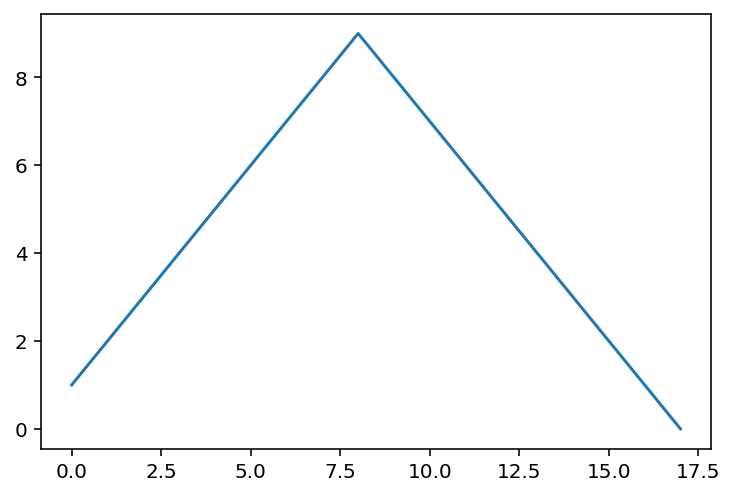

In [103]:
plt.figure
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [104]:
import numpy as np
t = np.arange(0, 12, 0.01)
y = np.sin(t)

In [105]:
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 1.197e+01, 1.198e+01,
       1.199e+01])

In [106]:
len(t)

1200

In [107]:
y

array([ 0.        ,  0.00999983,  0.01999867, ..., -0.5616433 ,
       -0.55334156, -0.54498449])

In [108]:
len(y)

1200

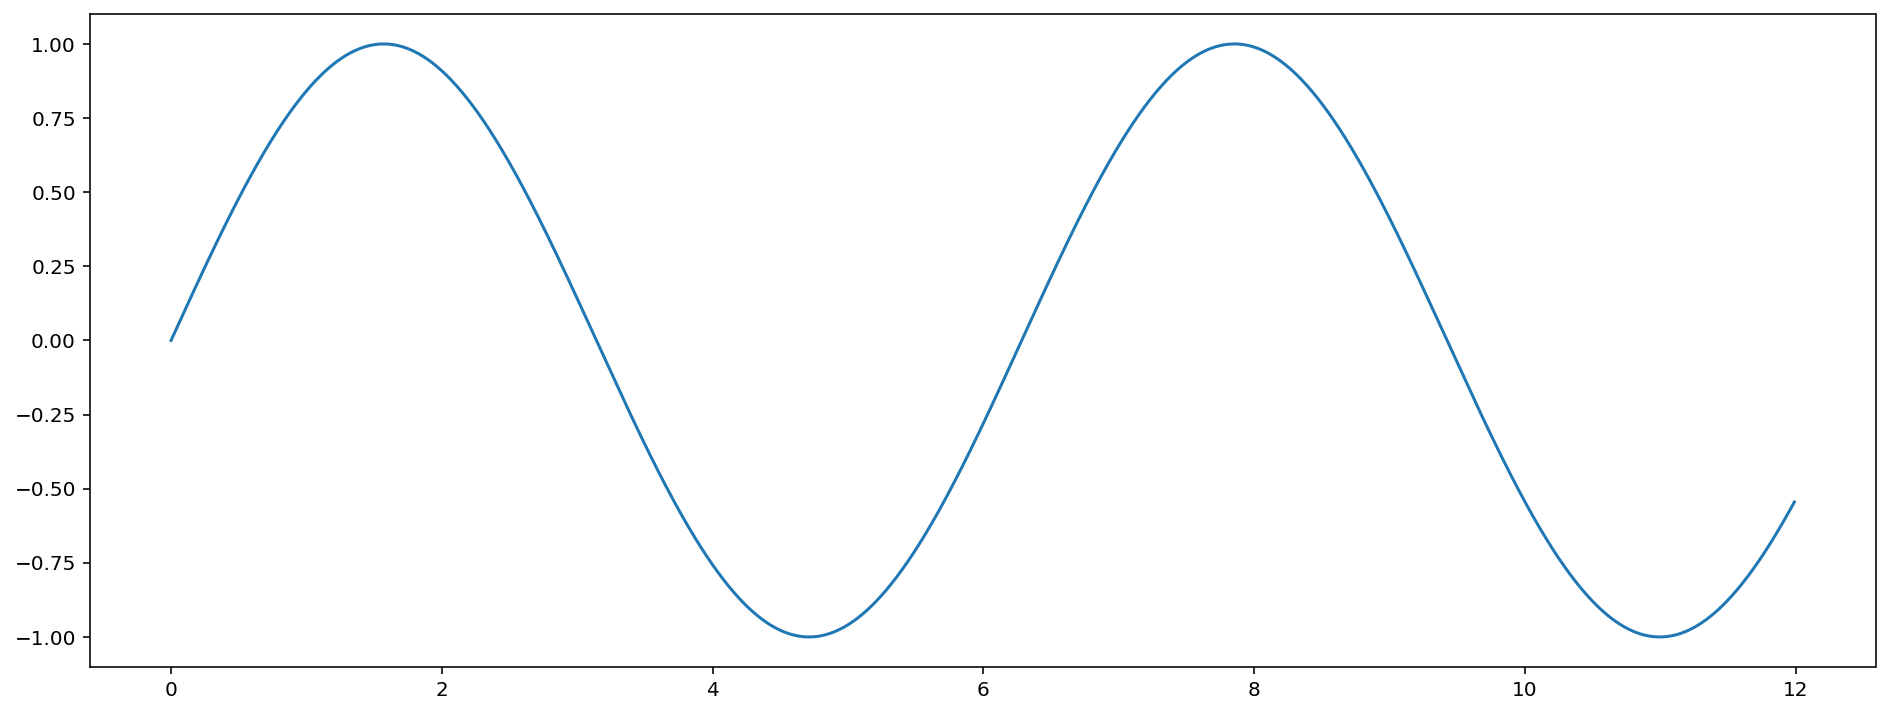

In [109]:
plt.figure(figsize=(16,6))
plt.plot(t, y)
plt.show()

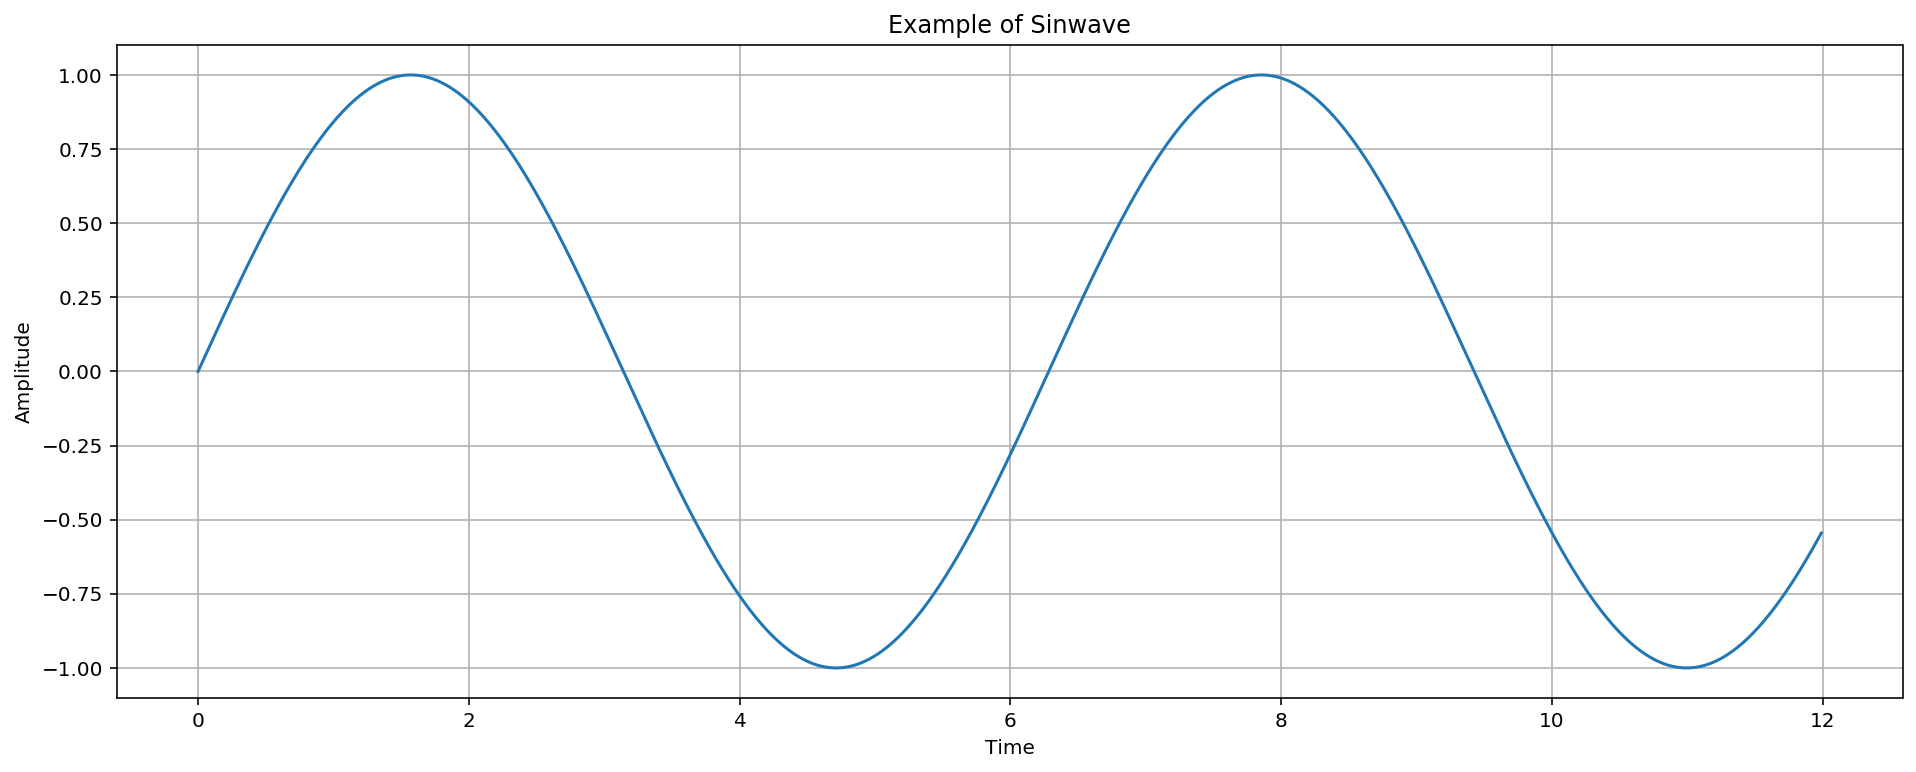

In [110]:
plt.figure(figsize=(16,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of Sinwave')
plt.show()

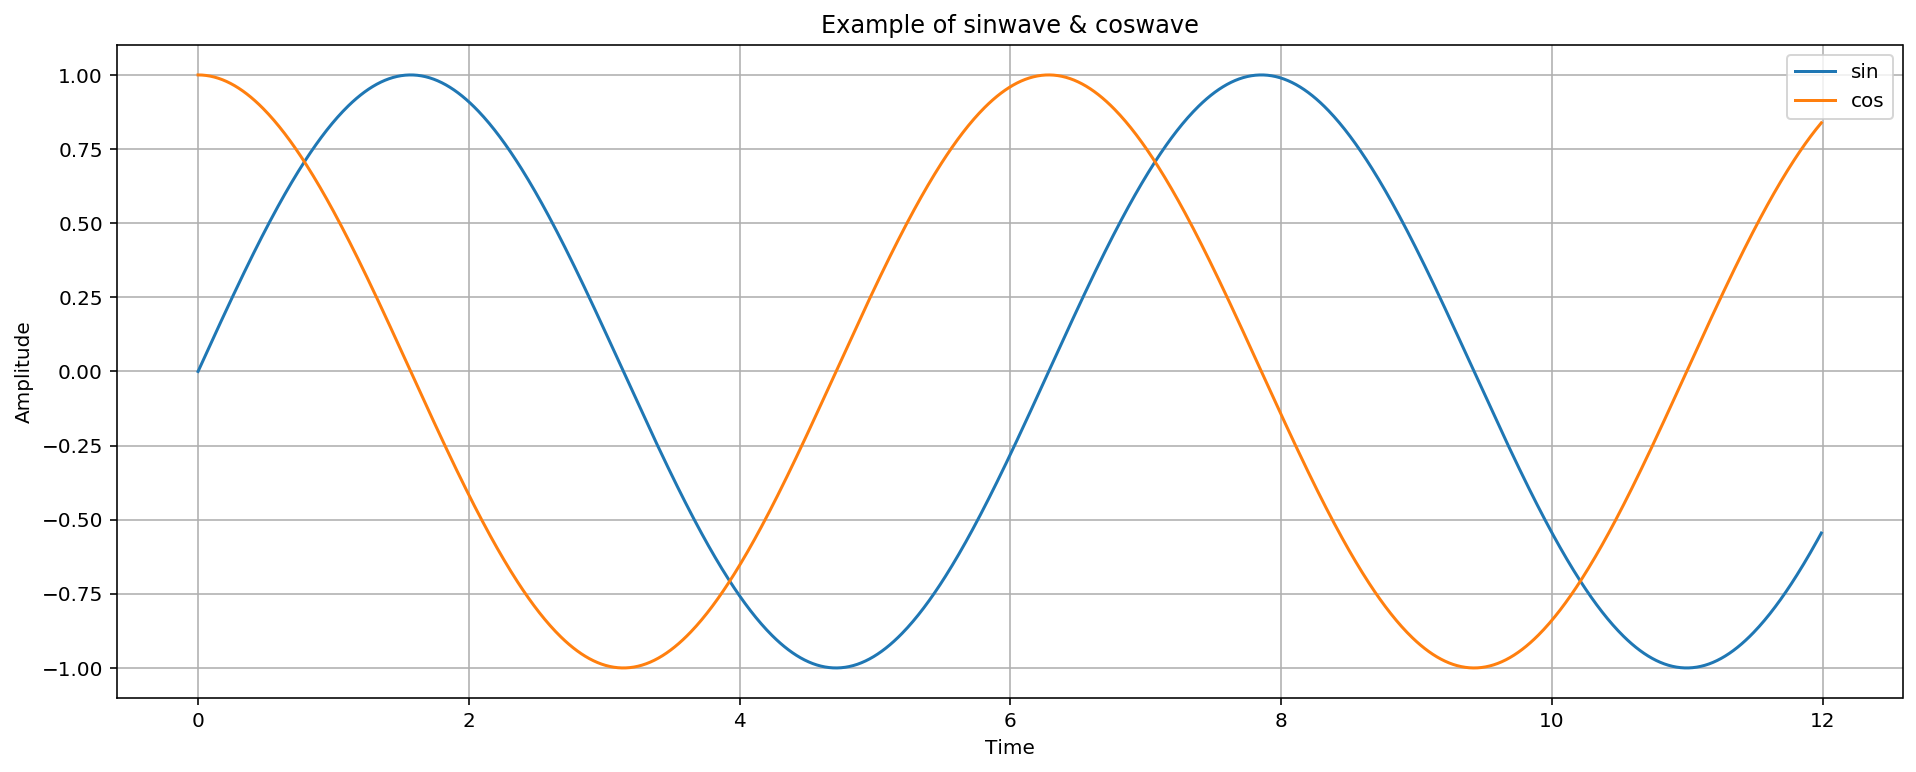

In [111]:
plt.figure(figsize=(16,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinwave & coswave')
plt.show()

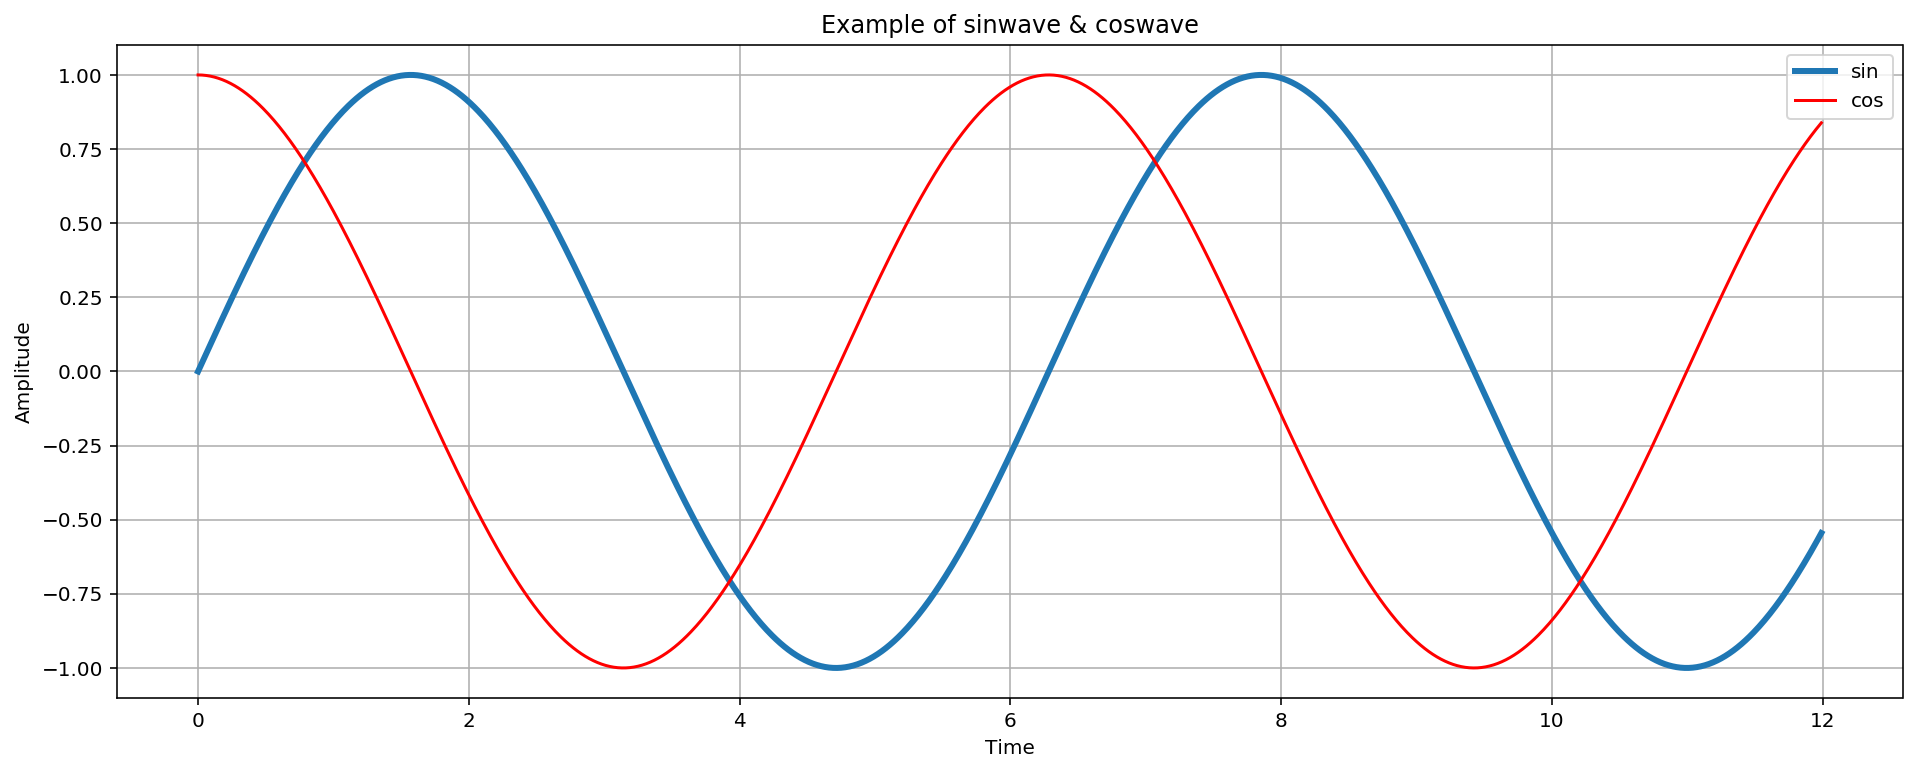

In [112]:
plt.figure(figsize=(16, 6))
plt.plot(t, np.sin(t), label='sin', lw=3)
plt.plot(t, np.cos(t), label='cos', color='r')
plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinwave & coswave')
plt.show()

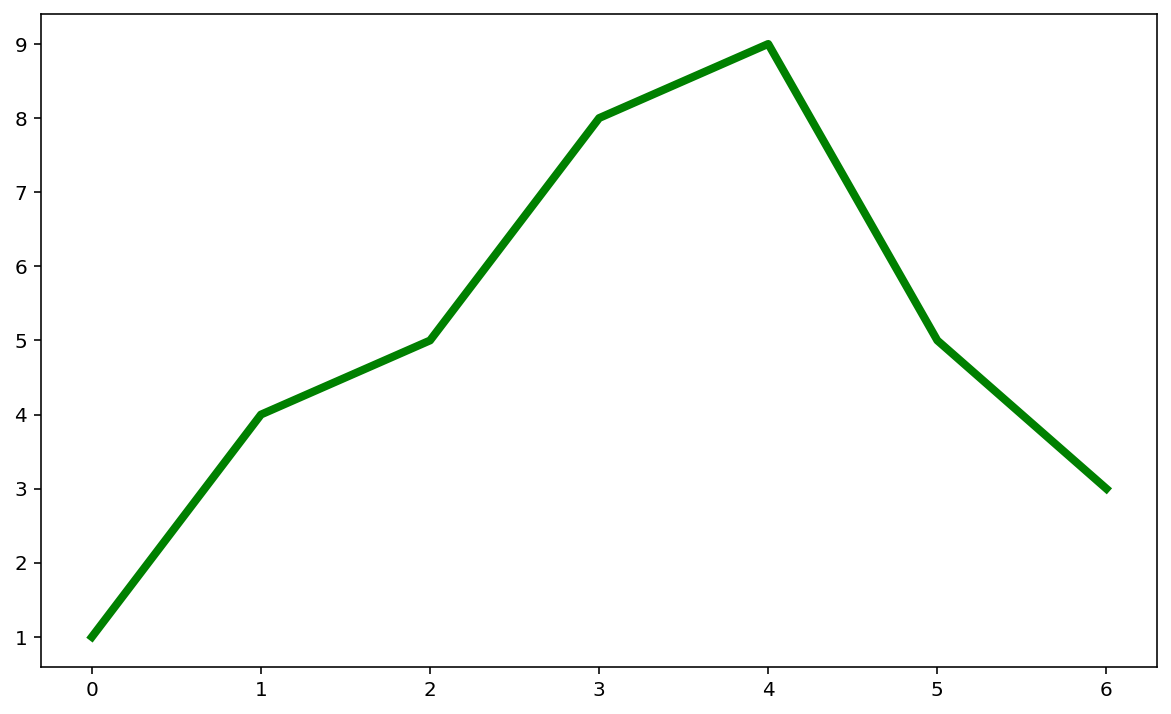

In [113]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', lw=4)
plt.show()

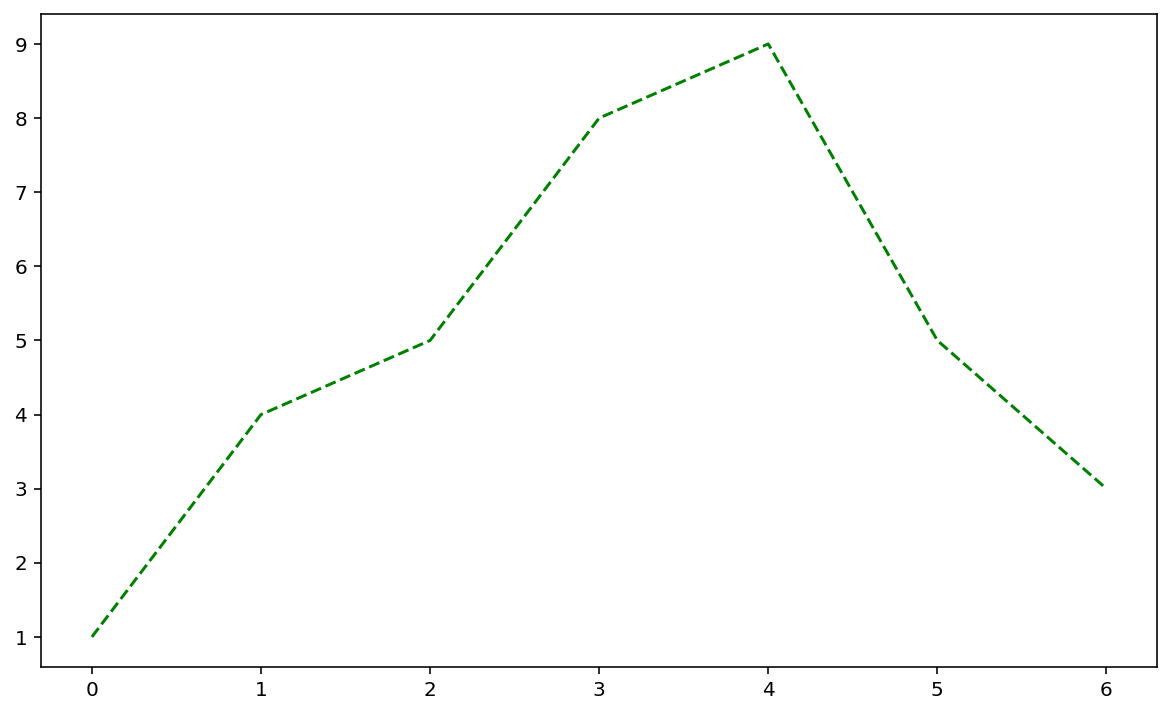

In [114]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

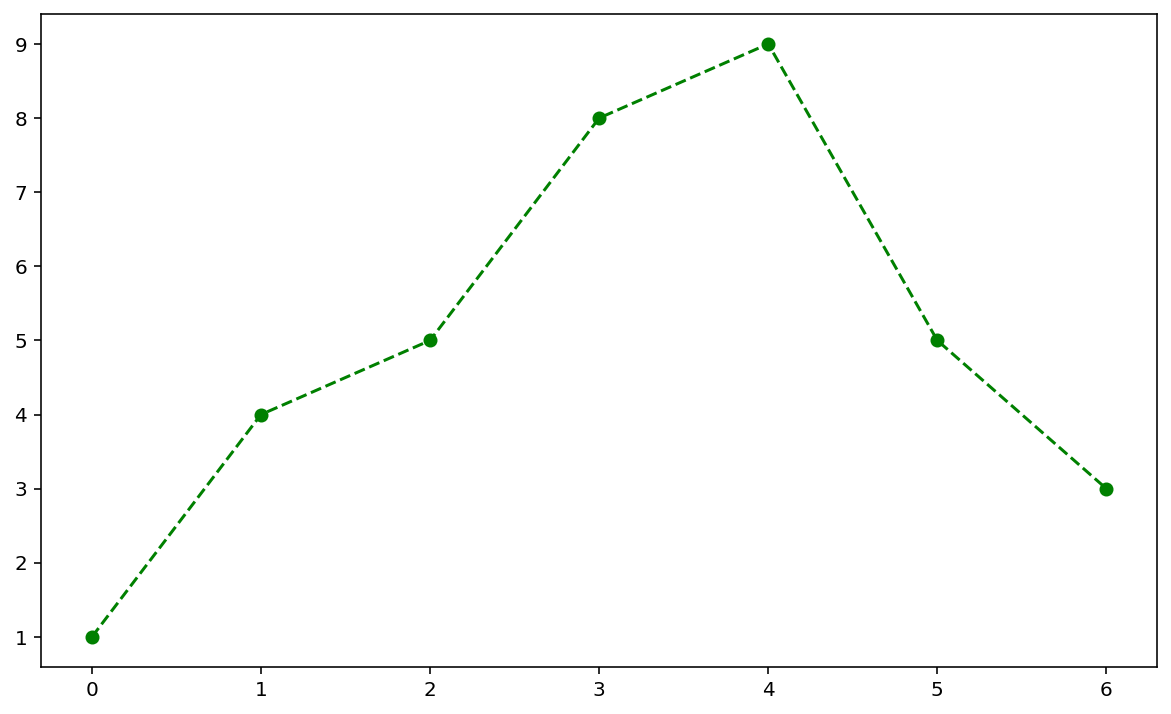

In [115]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

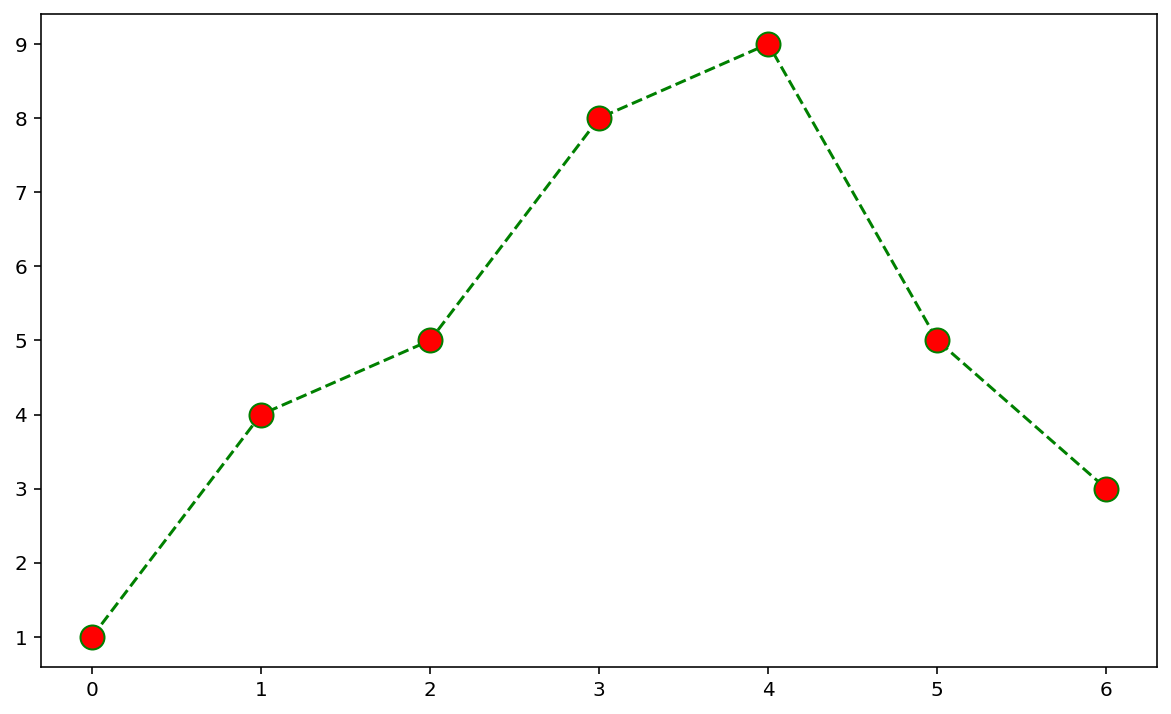

In [116]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=12)
plt.show()

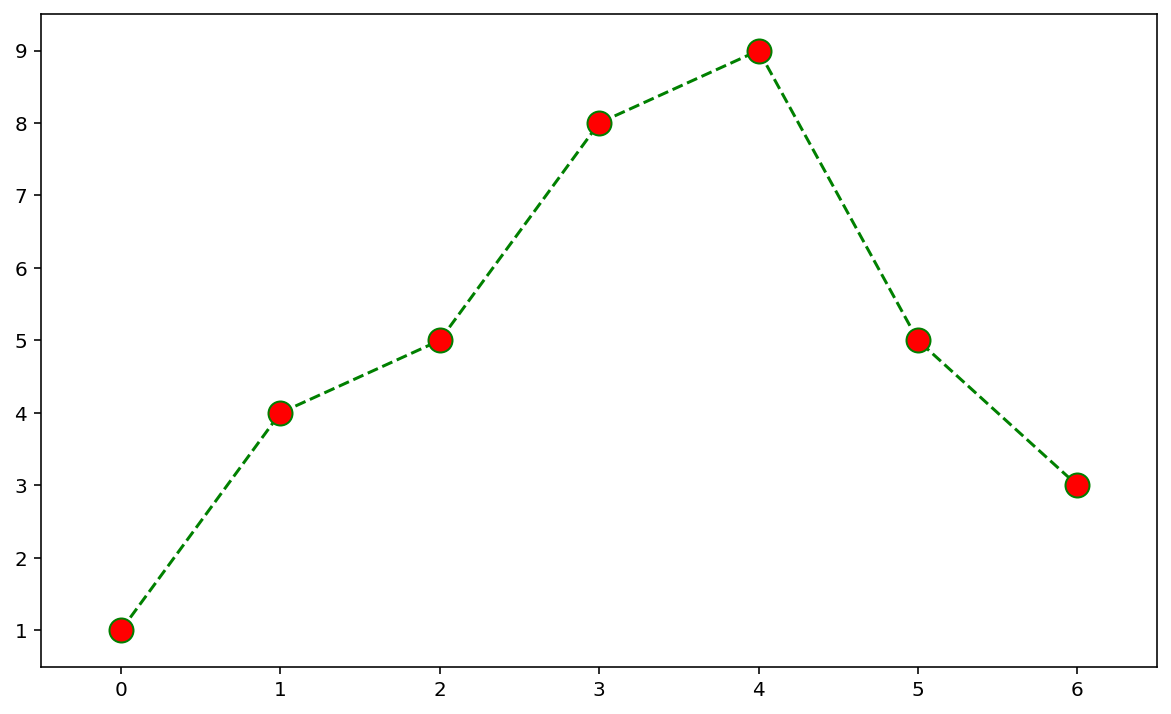

In [117]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=12)
plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

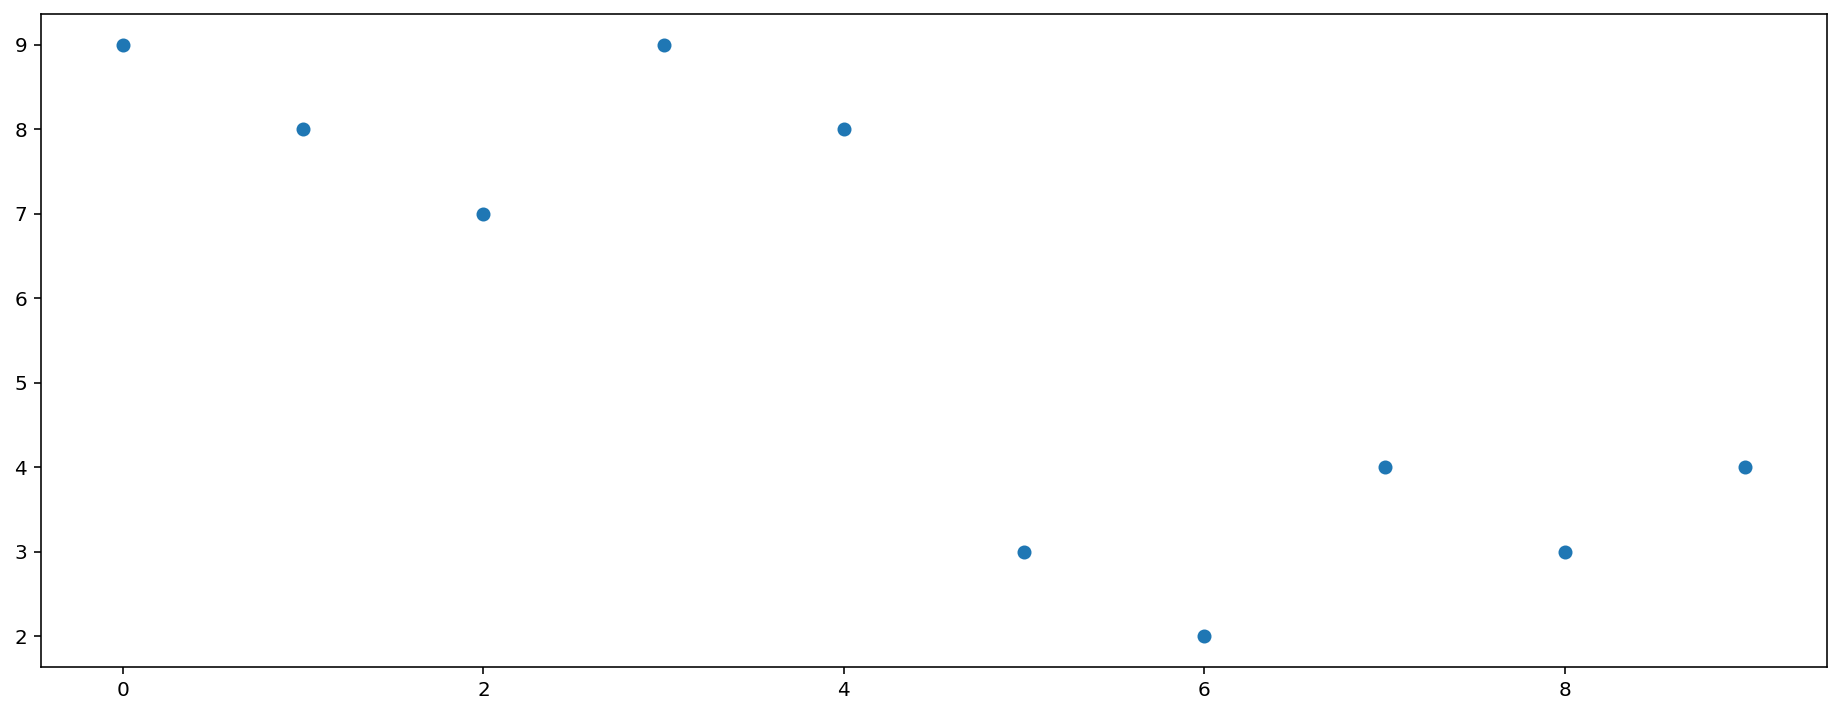

In [118]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])
plt.figure(figsize=(16,6))
plt.scatter(t, y)
plt.show()

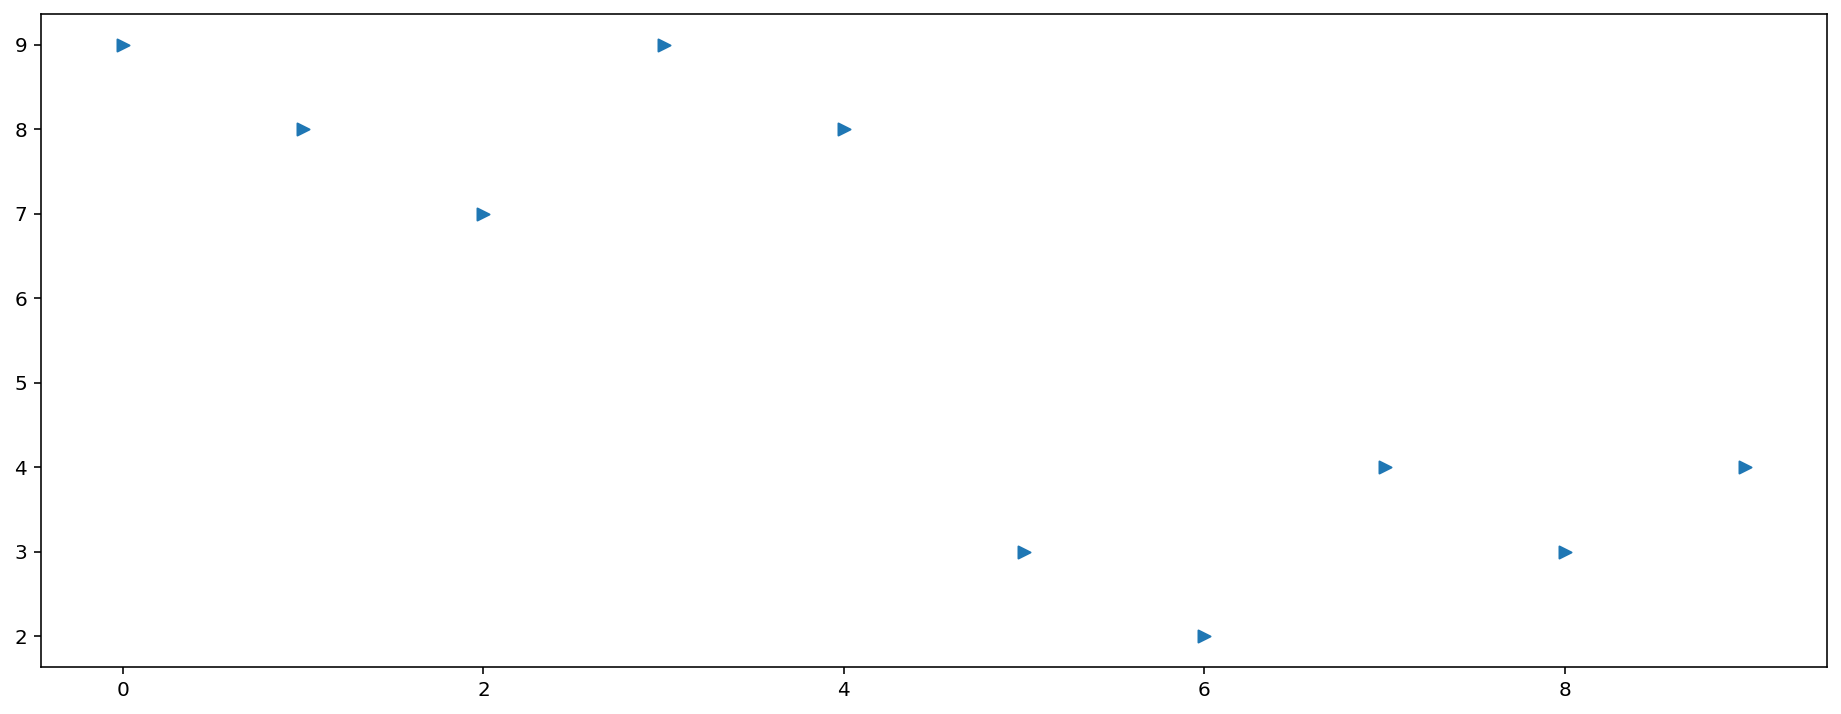

In [119]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])
plt.figure(figsize=(16,6))
plt.scatter(t, y, marker='>')
plt.show()

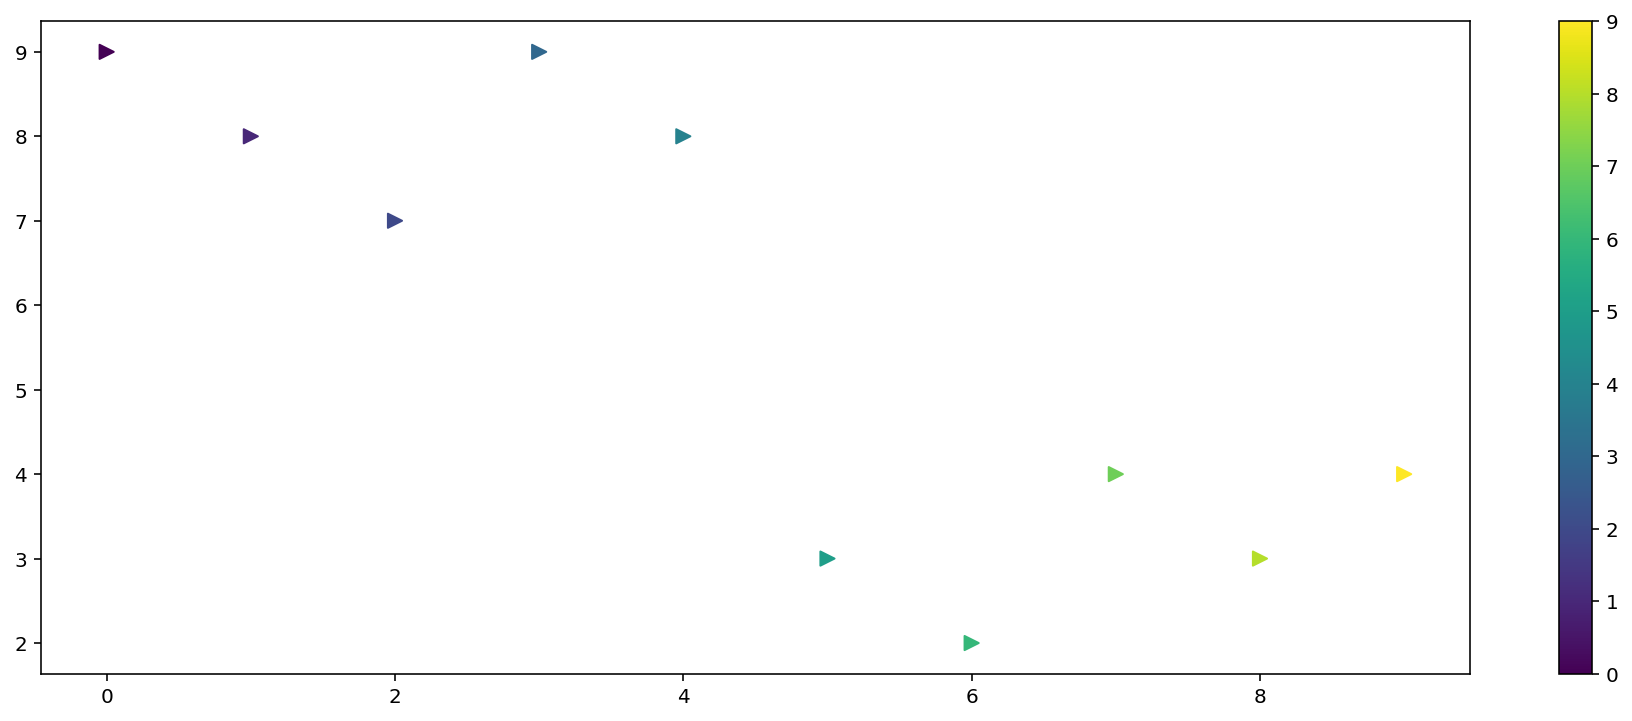

In [120]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

colormap = t

plt.figure(figsize=(16,6))
plt.scatter(t, y, s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()

In [121]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

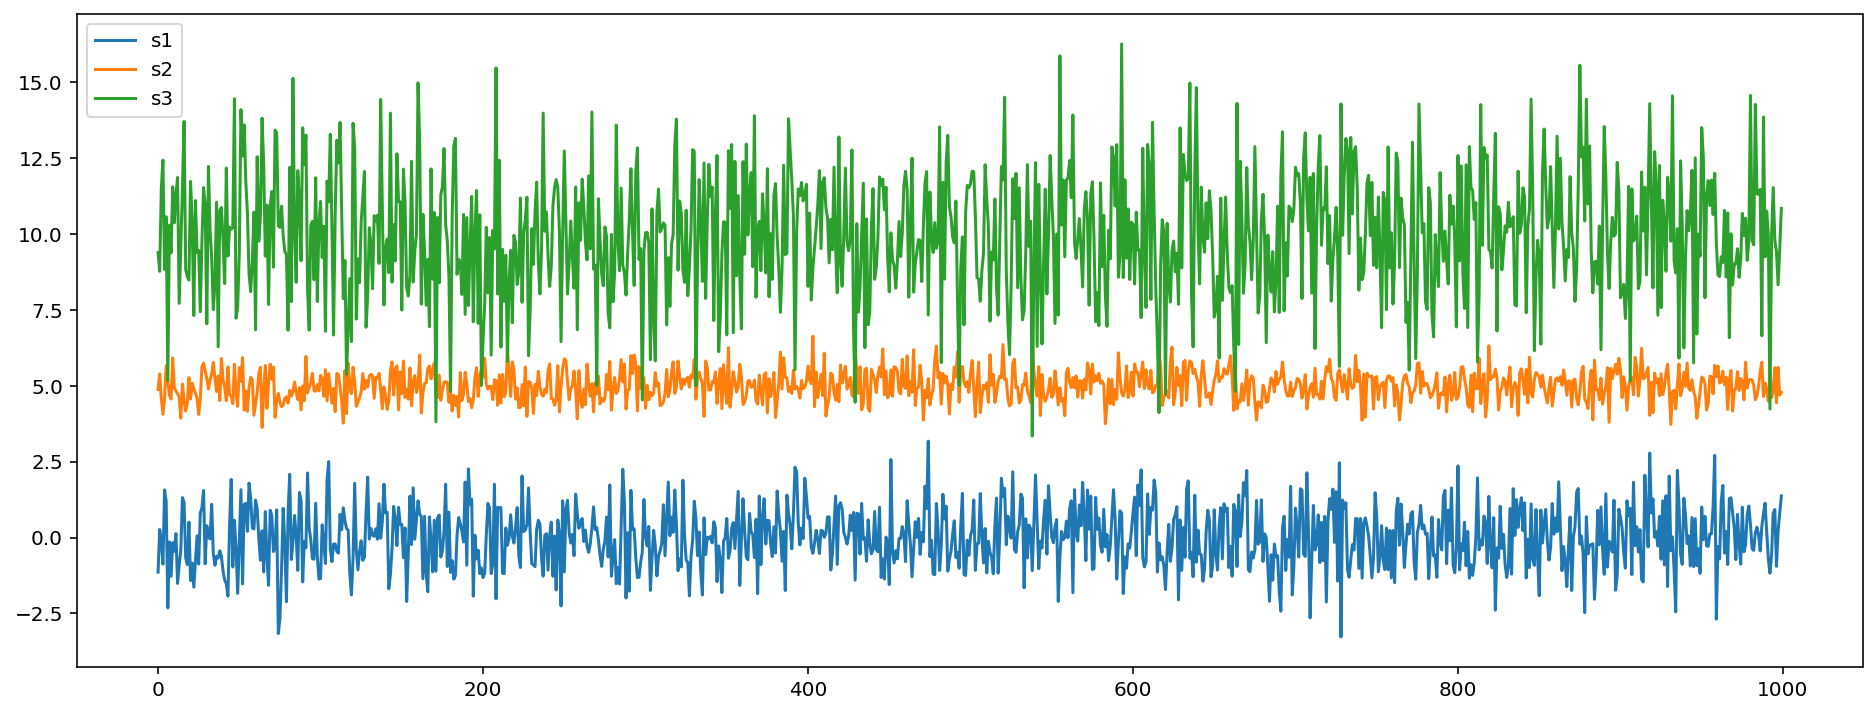

In [122]:
plt.figure(figsize=(16,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

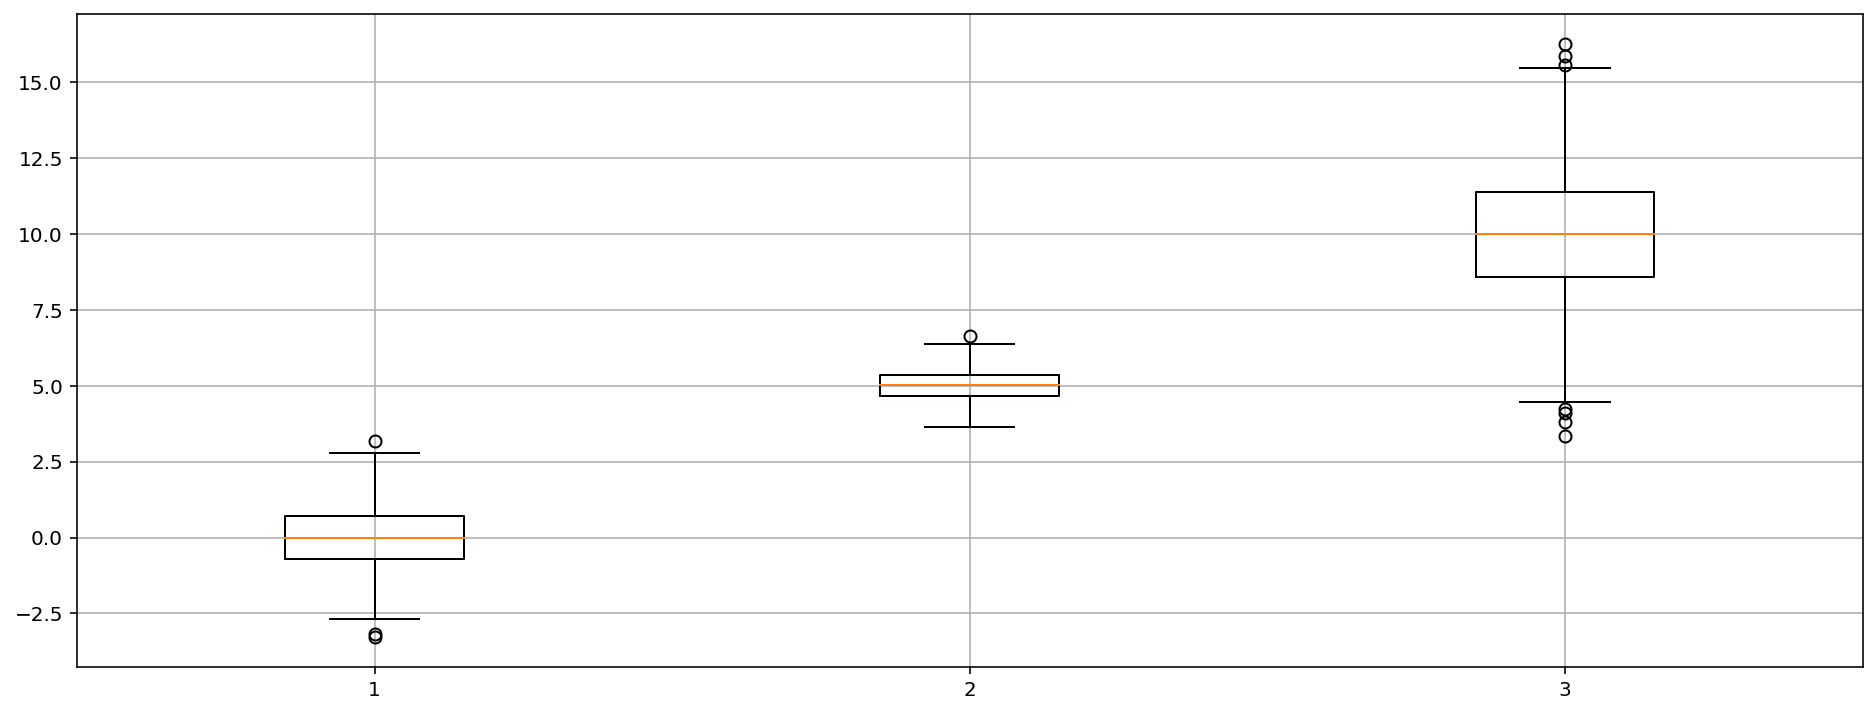

In [123]:
plt.figure(figsize=(16, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

## CCTV  현황 그래프로 분석하기

In [124]:
data_result.head()

소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율
구별                                                                        
강남구  5221.0   59.646784  547453  542364   5089  67085  0.929578  12.254020
강동구  1879.0   88.016529  431920  427573   4347  58770  1.006436  13.606686
강북구  1265.0   93.030794  322915  319164   3751  58196  1.161606  18.022080
강서구  1617.0  104.270987  603611  596949   6662  79660  1.103691  13.197241
관악구  3985.0  131.043593  520040  501957  18083  72249  3.477233  13.892970

In [125]:
import platform
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

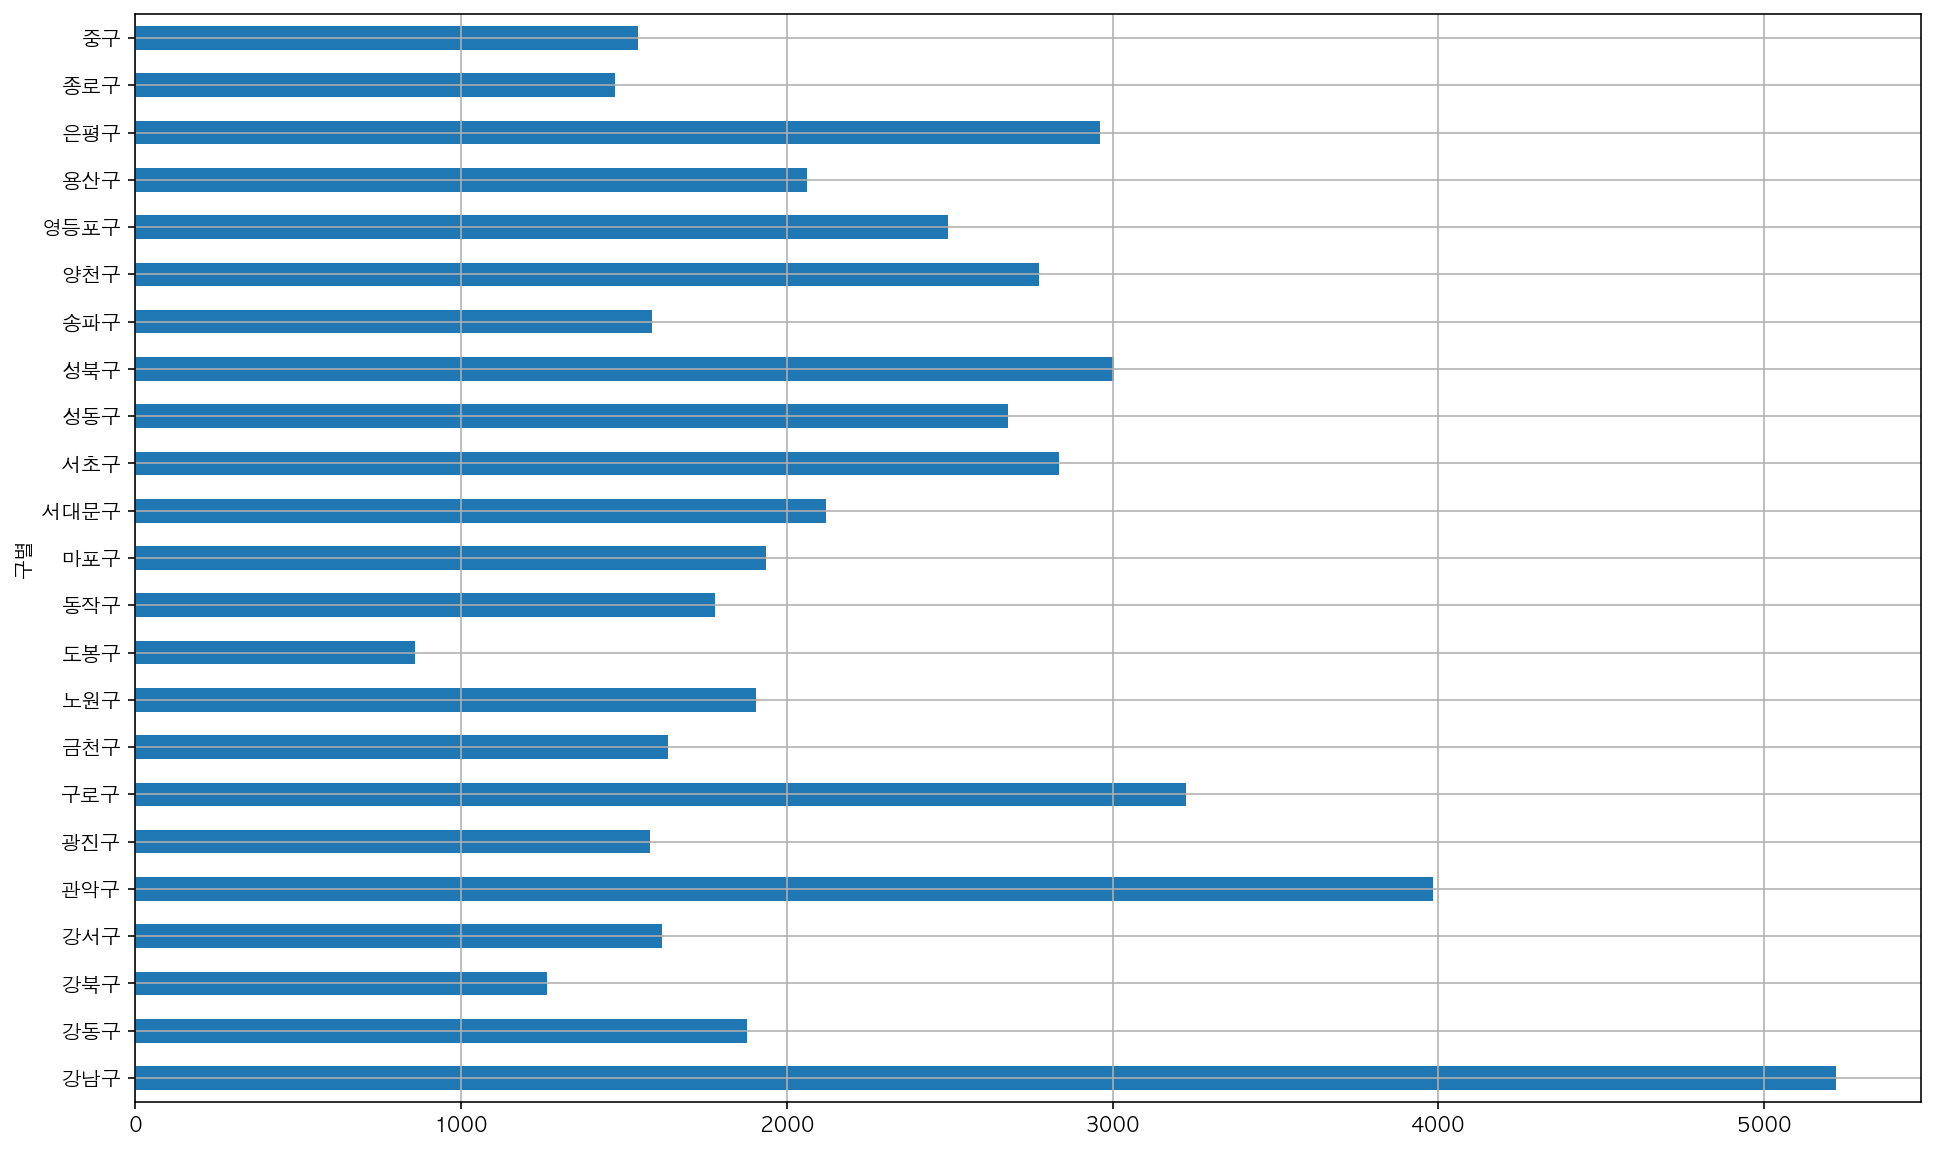

In [126]:
data_result['소계'].plot(kind='barh', grid=True, figsize=(16,10))
plt.show()

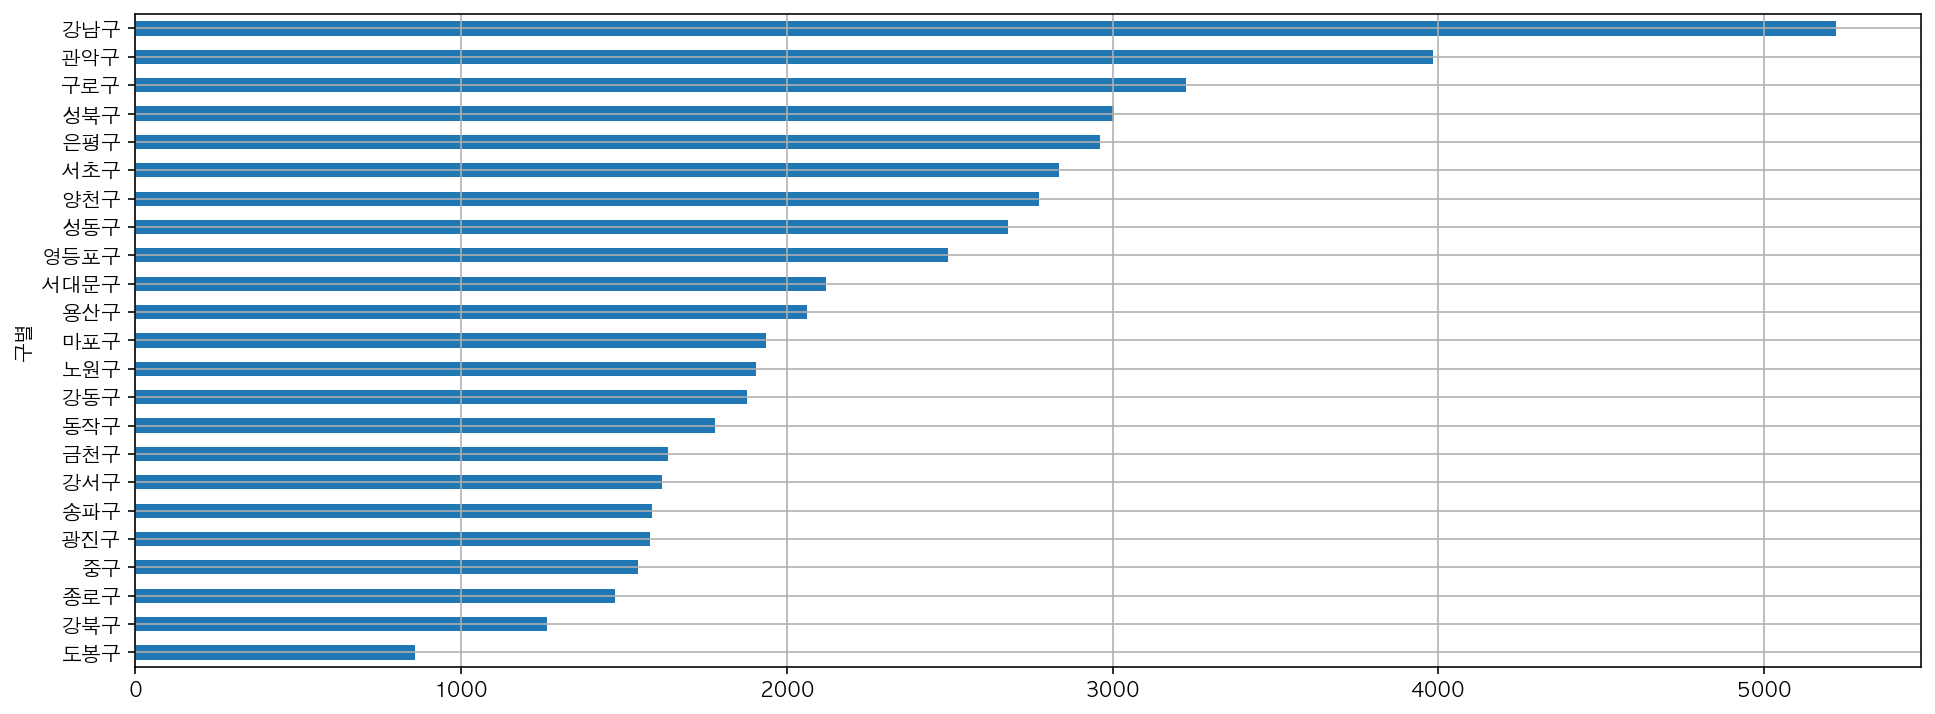

In [127]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(16,6))
plt.show()

In [128]:
data_result['cctv_비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result.head()

소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율  \
구별                                                                           
강남구  5221.0   59.646784  547453  542364   5089  67085  0.929578  12.254020   
강동구  1879.0   88.016529  431920  427573   4347  58770  1.006436  13.606686   
강북구  1265.0   93.030794  322915  319164   3751  58196  1.161606  18.022080   
강서구  1617.0  104.270987  603611  596949   6662  79660  1.103691  13.197241   
관악구  3985.0  131.043593  520040  501957  18083  72249  3.477233  13.892970   

      cctv_비율  
구별             
강남구  0.953689  
강동구  0.435034  
강북구  0.391744  
강서구  0.267888  
관악구  0.766287

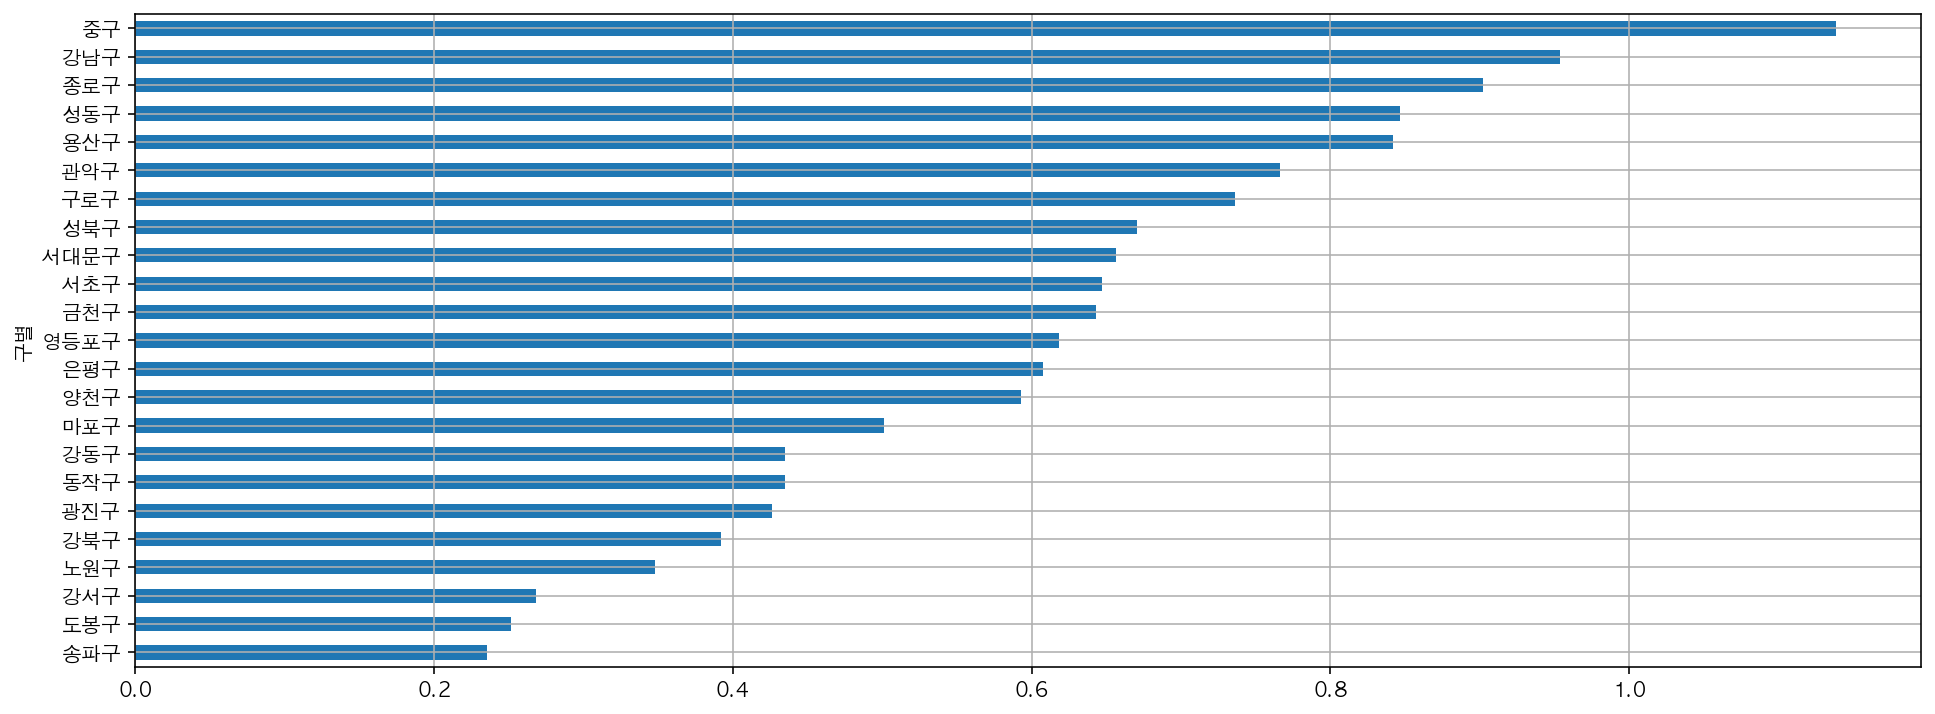

In [129]:
data_result['cctv_비율'].sort_values().plot(kind='barh', grid=True, figsize=(16, 6))
plt.show()

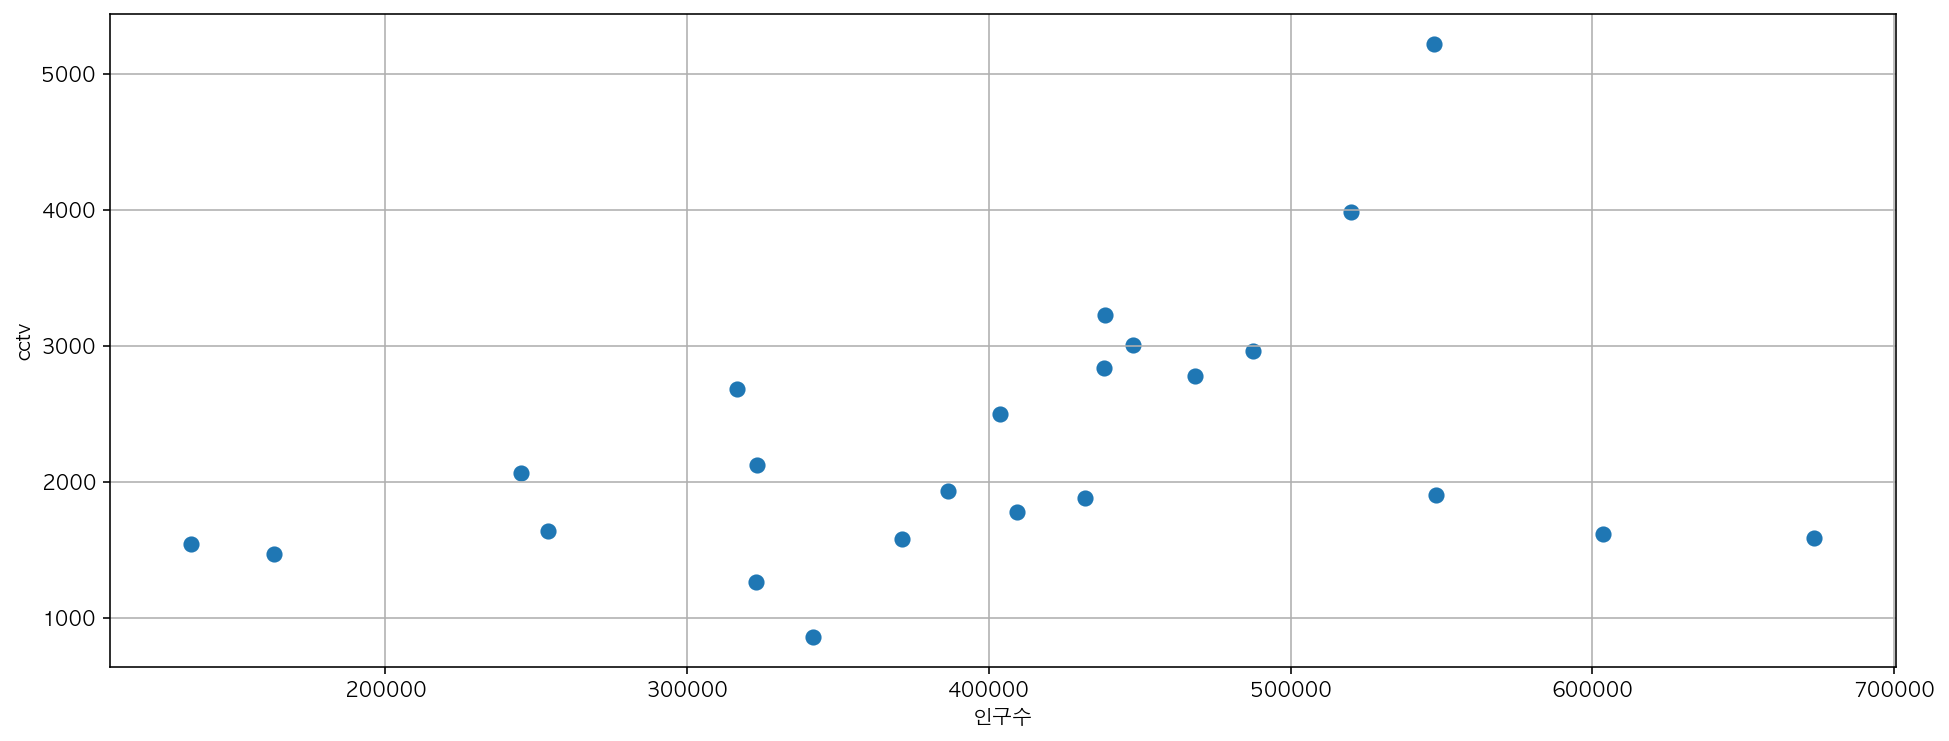

In [130]:
plt.figure(figsize=(16, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [131]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.85586186e-03, 1.12729657e+03])

In [132]:
f1 = np.poly1d(fp1)
f1

poly1d([2.85586186e-03, 1.12729657e+03])

In [133]:
fx = np.linspace(100000, 700000, 100)
fx.shape

(100,)

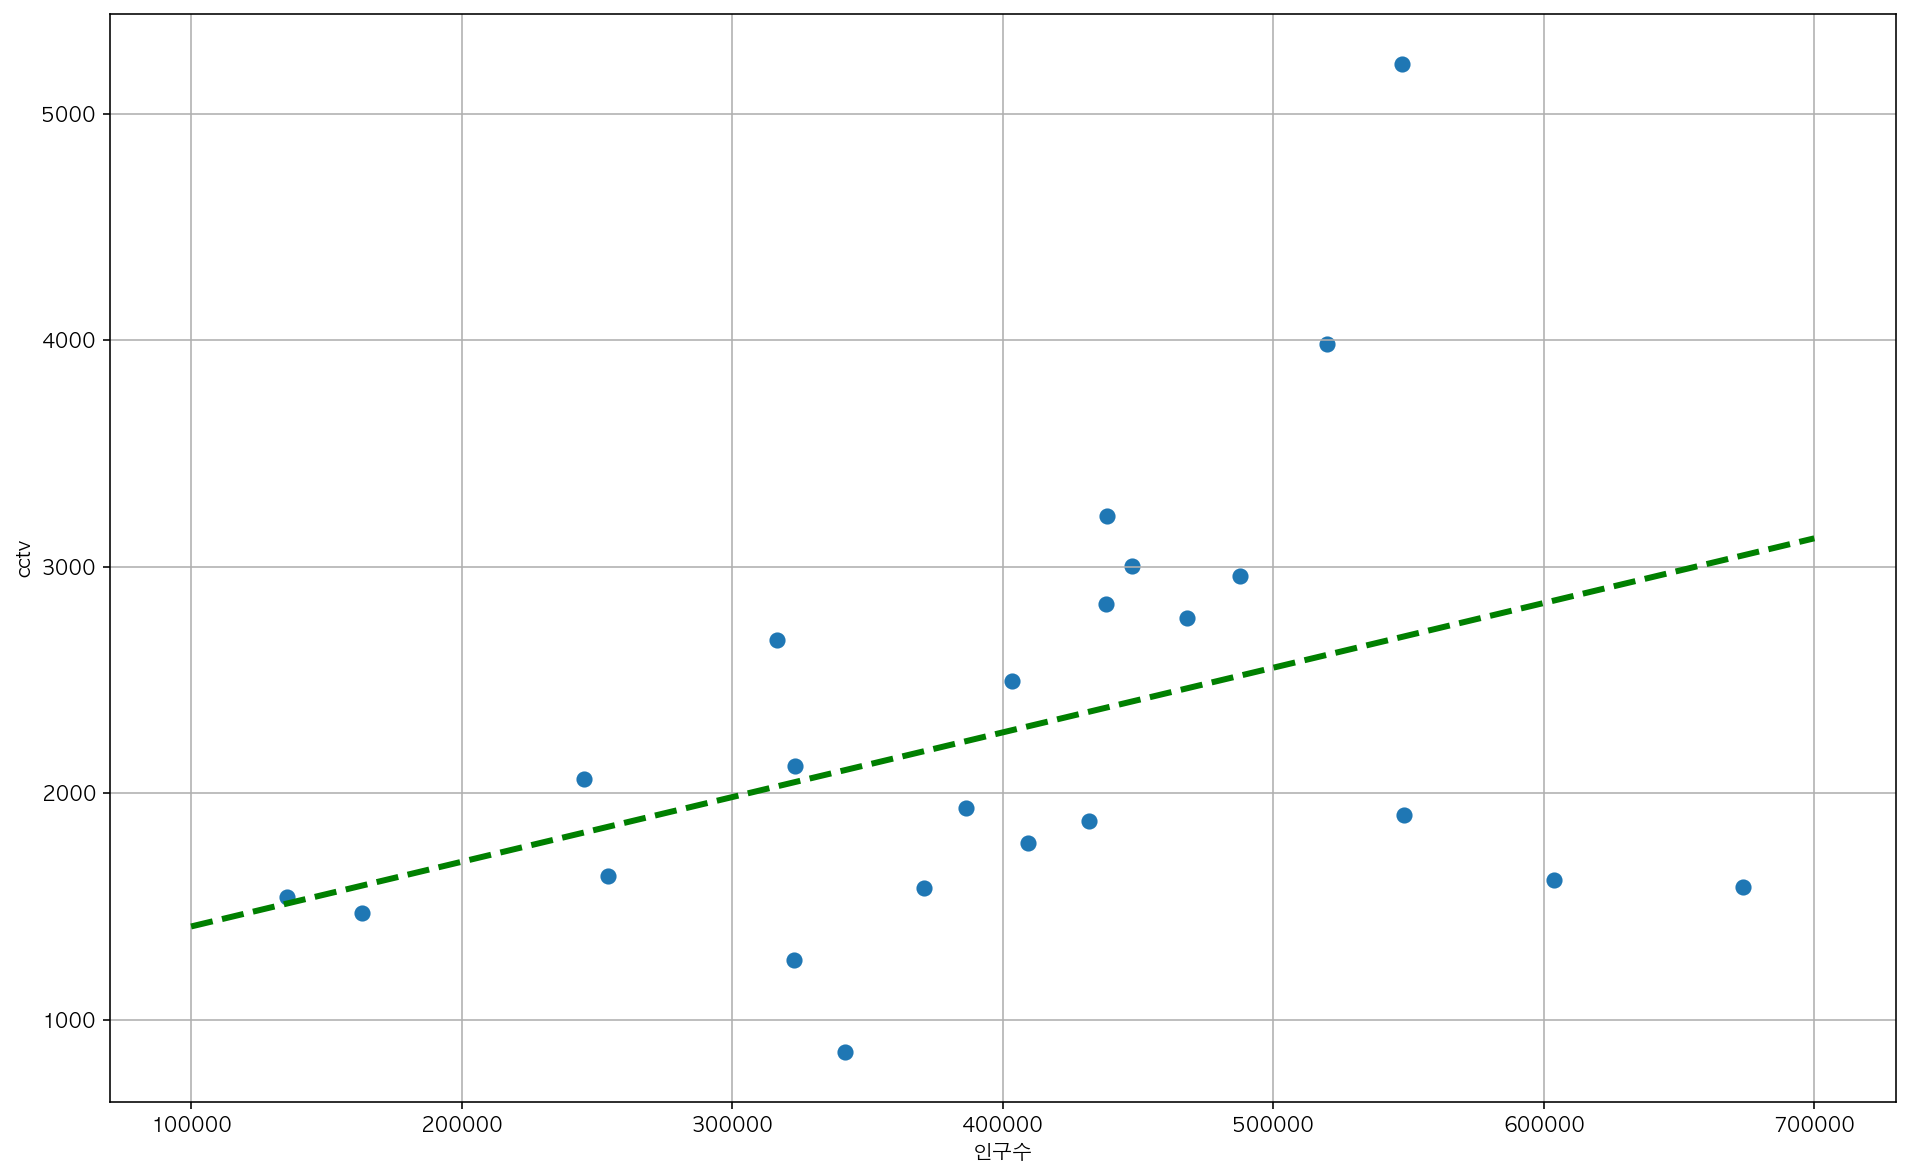

In [134]:
plt.figure(figsize=(16,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('cctv')
plt.grid()
plt.show()

In [135]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율  \
구별                                                                           
강남구  5221.0   59.646784  547453  542364   5089  67085  0.929578  12.254020   
송파구  1586.0   64.218258  673507  666635   6872  81364  1.020331  12.080647   
관악구  3985.0  131.043593  520040  501957  18083  72249  3.477233  13.892970   
도봉구   858.0  103.939394  341649  339413   2236  55964  0.654473  16.380554   
강서구  1617.0  104.270987  603611  596949   6662  79660  1.103691  13.197241   

      cctv_비율           오차  
구별                          
강남구  0.953689  2530.253288  
송파구  0.235484  1464.739523  
관악구  0.766287  1372.541029  
도봉구  0.251135  1244.998919  
강서구  0.267888  1234.126202

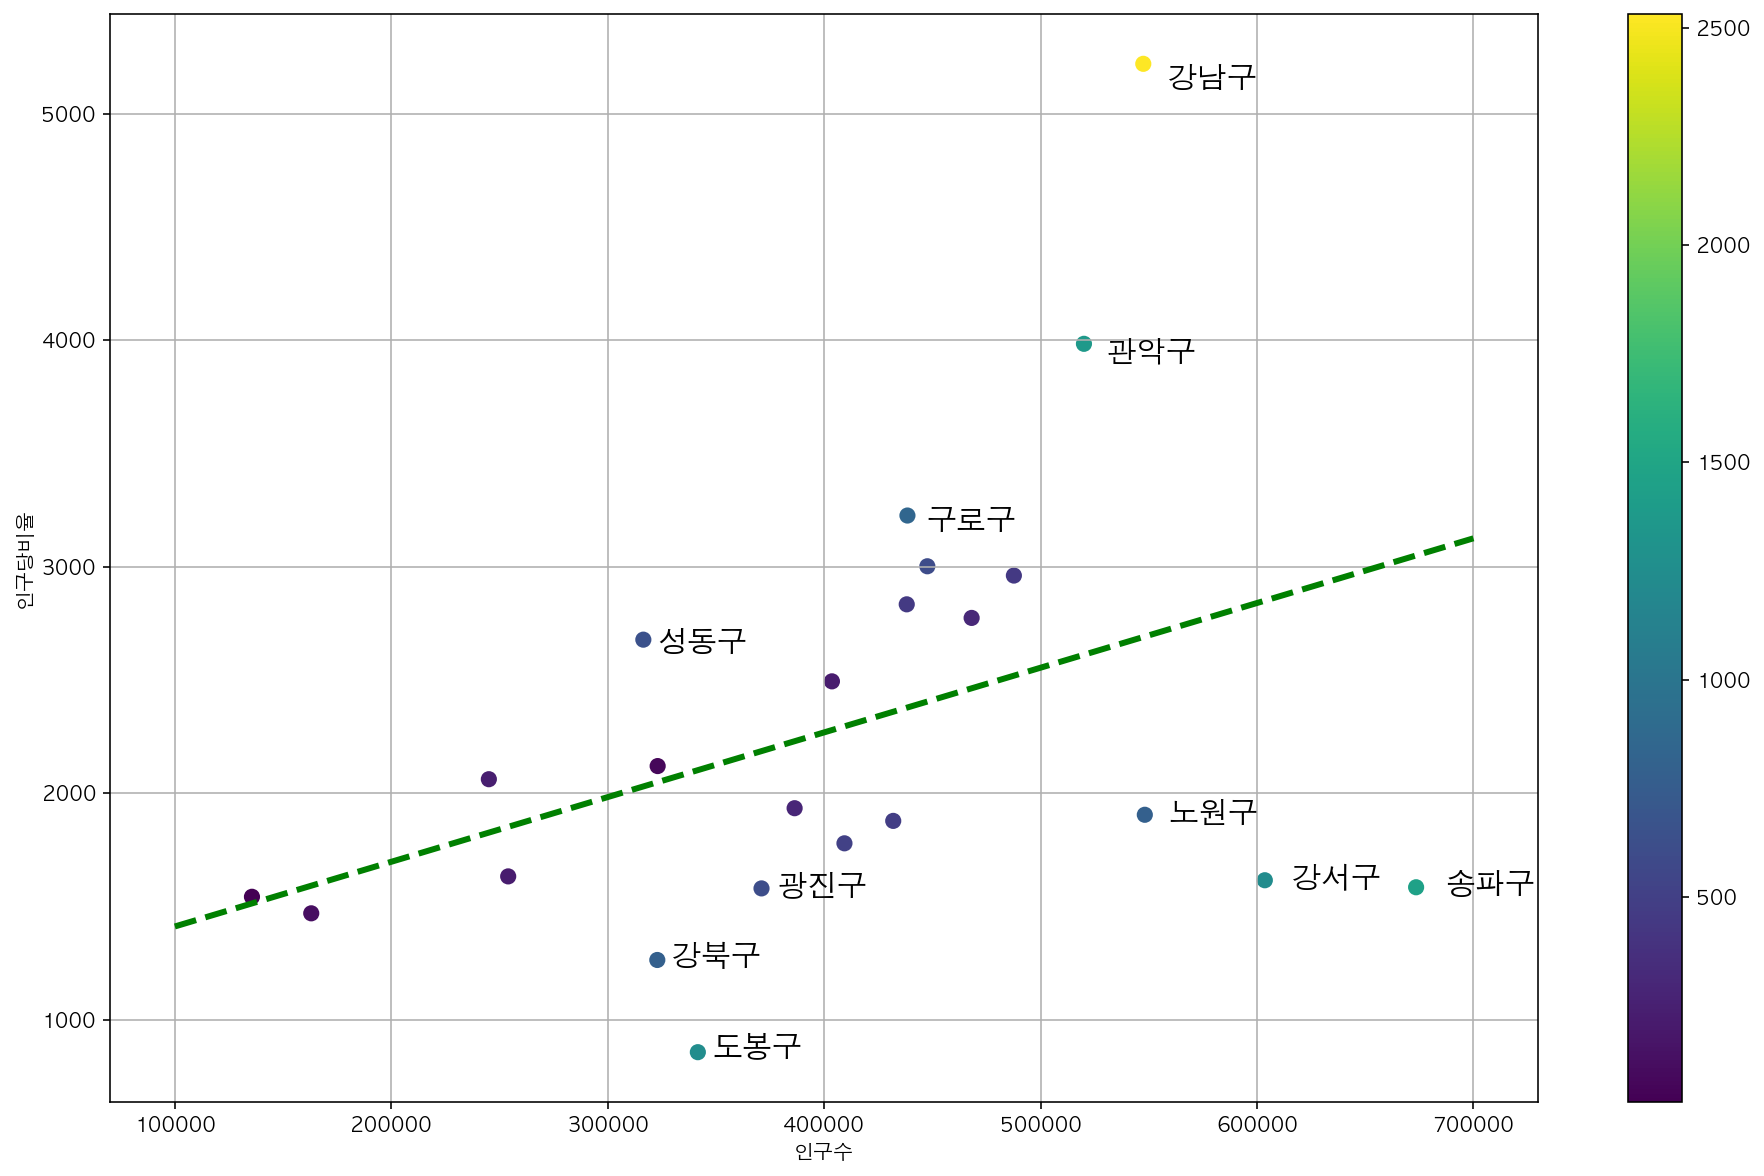

In [136]:
plt.figure(figsize=(16, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()